In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from tqdm import tqdm_notebook as tqdm

In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [6]:
# Importing 'ratings'.
ratings = pd.read_csv('ml-latest/ratings.csv')

In [7]:
ratings.head()

userId  movieId  rating   timestamp
0       1      307     3.5  1256677221
1       1      481     3.5  1256677456
2       1     1091     1.5  1256677471
3       1     1257     4.5  1256677460
4       1     1449     4.5  1256677264

In [8]:
# Importing movies.
movies = pd.read_csv('ml-latest/movies.csv')

In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 3 columns):
movieId    58098 non-null int64
title      58098 non-null object
genres     58098 non-null object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [10]:
# Importing genome tags IDs.
tags = pd.read_csv('ml-latest/tags.csv')

In [11]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108997 entries, 0 to 1108996
Data columns (total 4 columns):
userId       1108997 non-null int64
movieId      1108997 non-null int64
tag          1108981 non-null object
timestamp    1108997 non-null int64
dtypes: int64(3), object(1)
memory usage: 33.8+ MB


In [12]:
# Importing genome tags.
g_tags = pd.read_csv('ml-latest/genome-tags.csv')

In [13]:
g_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
tagId    1128 non-null int64
tag      1128 non-null object
dtypes: int64(1), object(1)
memory usage: 17.7+ KB


In [14]:
# Importing IMDb and TMDb IDs.
links = pd.read_csv('ml-latest/links.csv')

In [15]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 3 columns):
movieId    58098 non-null int64
imdbId     58098 non-null int64
tmdbId     57917 non-null float64
dtypes: float64(1), int64(2)
memory usage: 1.3 MB


In [16]:
# Importing genome tag values.
g_scores = pd.read_csv('ml-latest/genome-scores.csv')

In [17]:
g_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14862528 entries, 0 to 14862527
Data columns (total 3 columns):
movieId      int64
tagId        int64
relevance    float64
dtypes: float64(1), int64(2)
memory usage: 340.2 MB


### Creating master DF with review counts

In [18]:
# Adding IMDb,TMDb IDs to master. 
df_master = movies.merge(links,on='movieId')
df_master.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  imdbId   tmdbId  
0  Adventure|Animation|Children|Comedy|Fantasy  114709    862.0  
1                   Adventure|Children|Fantasy  113497   8844.0  
2                               Comedy|Romance  113228  15602.0  
3                         Comedy|Drama|Romance  114885  31357.0  
4                                       Comedy  113041  11862.0

In [19]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58098 entries, 0 to 58097
Data columns (total 5 columns):
movieId    58098 non-null int64
title      58098 non-null object
genres     58098 non-null object
imdbId     58098 non-null int64
tmdbId     57917 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.7+ MB


In [21]:
# IMDb IDs are not formatted correctly to match their display on the site.
def imdb_correcter(i):
    # First checking for base case and casting as string for API call, then adding missing syntax. 
    if len(str(i)) > 0:
        return 'tt' + '0'*(7-len(str(i))) + str(i)

In [22]:
# Applying IMDb correcter. 
df_master['imdbId'] = df_master.imdbId.apply(imdb_correcter)

In [23]:
df_master['imdbId']

0        tt0114709
1        tt0113497
2        tt0113228
3        tt0114885
4        tt0113041
5        tt0113277
6        tt0114319
7        tt0112302
8        tt0114576
9        tt0113189
10       tt0112346
11       tt0112896
12       tt0112453
13       tt0113987
14       tt0112760
15       tt0112641
16       tt0114388
17       tt0113101
18       tt0112281
19       tt0113845
20       tt0113161
21       tt0112722
22       tt0112401
23       tt0114168
24       tt0113627
25       tt0114057
26       tt0114011
27       tt0114117
28       tt0112682
29       tt0115012
30       tt0112792
31       tt0114746
32       tt0114952
33       tt0112431
34       tt0112637
35       tt0112818
36       tt0112286
37       tt0113442
38       tt0112697
39       tt0112749
40       tt0114279
41       tt0112819
42       tt0114272
43       tt0113855
44       tt0114681
45       tt0113347
46       tt0114369
47       tt0114148
48       tt0114916
49       tt0114814
50       tt0109950
51       tt0113819
52       tt0

In [24]:
# Casting TMDb IDs as strings for API calls. 
df_master['tmdbId'] = df_master['tmdbId'].astype('object')
df_master['tmdbId']

0           862
1          8844
2         15602
3         31357
4         11862
5           949
6         11860
7         45325
8          9091
9           710
10         9087
11        12110
12        21032
13        10858
14         1408
15          524
16         4584
17            5
18         9273
19        11517
20         8012
21         1710
22         9691
23        12665
24          451
25        16420
26         9263
27        17015
28          902
29        37557
30         9909
31           63
32        78802
33         9598
34        47018
35          687
36       139405
37        33689
38         9603
39        34615
40        31174
41        11443
42        35196
43         9312
44          577
45        11861
46          807
47        10530
48         8391
49          629
50       117164
51        11448
52        49133
53        26441
54        97406
55       124057
56         9089
57        11010
58        99040
59        11359
60        17182
61         2054
62      

In [25]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58098 entries, 0 to 58097
Data columns (total 5 columns):
movieId    58098 non-null int64
title      58098 non-null object
genres     58098 non-null object
imdbId     58098 non-null object
tmdbId     57917 non-null object
dtypes: int64(1), object(4)
memory usage: 2.7+ MB


In [26]:
df_master.loc[df_master.movieId == 1]

movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

      imdbId tmdbId  
0  tt0114709    862

In [27]:
# Renaming column 'userId' to 'count'.
ratings.rename(columns={'userId':'count'},inplace=True)

In [28]:
# Dropping unnecessary column.
ratings.drop(['timestamp'],inplace=True,axis=1)

In [29]:
# Creating new dataframe with count of each rating by movieID. 
ratbin = ratings.groupby(['movieId','rating']).count()

In [30]:
print(ratbin.loc[[ratbin.index.get_level_values(0)[10]]])

                count
movieId rating       
2       0.5       276
        1.0       813
        1.5       542
        2.0      2551
        2.5      1902
        3.0      8711
        3.5      3116
        4.0      6303
        4.5       790
        5.0      2139


In [31]:
ratbin.head()

count
movieId rating       
1       0.5       478
        1.0       840
        1.5       468
        2.0      2160
        2.5      1665

In [32]:
# Unstacking to get them into columns.
unstack = ratbin.unstack()
unstack.head()

count                                                          \
rating     0.5    1.0    1.5     2.0     2.5      3.0     3.5      4.0   
movieId                                                                  
1        478.0  840.0  468.0  2160.0  1665.0  11872.0  6095.0  22710.0   
2        276.0  813.0  542.0  2551.0  1902.0   8711.0  3116.0   6303.0   
3        174.0  777.0  237.0  1677.0   629.0   6227.0   774.0   3440.0   
4         48.0  352.0   31.0   497.0    77.0   1136.0    68.0    557.0   
5        248.0  802.0  282.0  1737.0   681.0   6655.0   761.0   2989.0   

                          
rating      4.5      5.0  
movieId                   
1        5684.0  16497.0  
2         790.0   2139.0  
3         159.0   1491.0  
4          12.0    211.0  
5         174.0   1145.0

In [33]:
unstack.isnull().sum()

       rating
count  0.5       30889
       1.0       33213
       1.5       34230
       2.0       27150
       2.5       23590
       3.0       16780
       3.5       19136
       4.0       21634
       4.5       30302
       5.0       29680
dtype: int64

In [34]:
df_master = df_master.merge(unstack,on='movieId')

/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [39]:
df_master.isnull().sum()

movieId             0
title               0
genres              0
imdbId              0
tmdbId            177
(count, 0.5)    30889
(count, 1.0)    33213
(count, 1.5)    34230
(count, 2.0)    27150
(count, 2.5)    23590
(count, 3.0)    16780
(count, 3.5)    19136
(count, 4.0)    21634
(count, 4.5)    30302
(count, 5.0)    29680
dtype: int64

In [35]:
df_master.head(10)

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   
5        6                         Heat (1995)   
6        7                      Sabrina (1995)   
7        8                 Tom and Huck (1995)   
8        9                 Sudden Death (1995)   
9       10                    GoldenEye (1995)   

                                        genres     imdbId tmdbId  \
0  Adventure|Animation|Children|Comedy|Fantasy  tt0114709    862   
1                   Adventure|Children|Fantasy  tt0113497   8844   
2                               Comedy|Romance  tt0113228  15602   
3                         Comedy|Drama|Romance  tt0114885  31357   
4                                       Comedy  tt0113041  11862   
5                        Action|Crime|Thriller  tt0113277    949   
6                               Comedy|Romance  tt0114319  11860   
7                           Adventure|Children  tt0112302  45325   
8                                       Action  tt0114576   9091   
9                    Action|Adventure|Thriller  tt0113189    710   

   (count, 0.5)  (count, 1.0)  (count, 1.5)  (count, 2.0)  (count, 2.5)  \
0         478.0         840.0         468.0        2160.0        1665.0   
1         276.0         813.0         542.0        2551.0        1902.0   
2         174.0         777.0         237.0        1677.0         629.0   
3          48.0         352.0          31.0         497.0          77.0   
4         248.0         802.0         282.0        1737.0         681.0   
5          53.0         339.0          71.0        1013.0         415.0   
6         141.0         409.0         155.0        1186.0         489.0   
7          14.0          87.0          13.0         181.0          55.0   
8          25.0         310.0          59.0         587.0         148.0   
9         166.0         632.0         226.0        2038.0        1058.0   

   (count, 3.0)  (count, 3.5)  (count, 4.0)  (count, 4.5)  (count, 5.0)  
0       11872.0        6095.0       22710.0        5684.0       16497.0  
1        8711.0        3116.0        6303.0         790.0        2139.0  
2        6227.0         774.0        3440.0         159.0        1491.0  
3        1136.0          68.0         557.0          12.0         211.0  
4        6655.0         761.0        2989.0         174.0        1145.0  
5        6740.0        1994.0        9613.0        2296.0        6149.0  
6        5978.0         748.0        4122.0         253.0        1820.0  
7         669.0          60.0         318.0          13.0         129.0  
8        2089.0          90.0         853.0          17.0         271.0  
9       12189.0        2882.0        9909.0         912.0        3074.0

### Grabbing movies with cult, so bad its good, so bad its funny genome tags.

In [36]:
tags = [1058,933,934,891,616,274,275,276,198]
g_rev = g_scores.loc[g_scores['tagId'].isin(tags)]
g_rev.head()


movieId  tagId  relevance
197        1    198    0.07500
273        1    274    0.21400
274        1    275    0.30725
275        1    276    0.21925
615        1    616    0.07300

In [37]:
g_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118584 entries, 197 to 14862457
Data columns (total 3 columns):
movieId      118584 non-null int64
tagId        118584 non-null int64
relevance    118584 non-null float64
dtypes: float64(1), int64(2)
memory usage: 3.6 MB


In [38]:
g_rev.isnull().sum()

movieId      0
tagId        0
relevance    0
dtype: int64

In [39]:
# Creating a new matrix with relevance scores. 
g_test = g_rev.pivot(index='movieId',columns='tagId',values='relevance')
g_test.head(100)

tagId       198      274      275      276      616      891      933   \
movieId                                                                  
1        0.07500  0.21400  0.30725  0.21925  0.07300  0.11750  0.13650   
2        0.19625  0.11075  0.11025  0.19675  0.04200  0.04500  0.28000   
3        0.06900  0.04100  0.10225  0.17550  0.02775  0.04600  0.22900   
4        0.07775  0.04275  0.10675  0.21600  0.05475  0.02800  0.28075   
5        0.08750  0.02750  0.08375  0.17825  0.02875  0.02925  0.24200   
6        0.02825  0.15575  0.36400  0.40450  0.06575  0.04675  0.15225   
7        0.09875  0.02550  0.11000  0.14500  0.01825  0.03275  0.23550   
8        0.06325  0.02575  0.07950  0.19175  0.02675  0.02100  0.26150   
9        0.17800  0.02500  0.11650  0.18300  0.03300  0.02550  0.50225   
10       0.13250  0.06900  0.11075  0.16375  0.04550  0.18600  0.19325   
11       0.19825  0.04175  0.11175  0.16700  0.06150  0.06150  0.20975   
12       0.06725  0.06325  0.20825  0.30275  0.09075  0.03475  0.60325   
13       0.05525  0.03150  0.09425  0.18725  0.06125  0.02175  0.28300   
14       0.03550  0.10825  0.21775  0.23425  0.05800  0.04475  0.27050   
15       0.27875  0.03400  0.22775  0.24025  0.03750  0.04850  0.59225   
16       0.02000  0.28775  0.55075  0.42150  0.11550  0.04275  0.12775   
17       0.03875  0.07300  0.14225  0.19800  0.05925  0.03825  0.15675   
18       0.06875  0.20825  0.51950  0.37175  0.07300  0.03950  0.33350   
19       0.04400  0.06700  0.16575  0.54475  0.07575  0.04950  0.38525   
20       0.09700  0.03425  0.11700  0.21325  0.02525  0.03375  0.38025   
21       0.02475  0.20025  0.50475  0.23250  0.24675  0.06975  0.18075   
22       0.04525  0.04300  0.08625  0.17250  0.02950  0.03750  0.20200   
23       0.10625  0.04575  0.12450  0.20450  0.02225  0.02325  0.33400   
24       0.18100  0.11550  0.14250  0.24000  0.06550  0.15775  0.50325   
25       0.03475  0.18250  0.48575  0.39775  0.19375  0.02900  0.16875   
26       0.04550  0.06925  0.17075  0.22175  0.04025  0.05575  0.26800   
27       0.14100  0.06300  0.19700  0.18075  0.01950  0.02900  0.25500   
28       0.03100  0.04725  0.17400  0.20775  0.07325  0.05300  0.16225   
29       0.02075  0.43350  0.64800  0.52875  0.15425  0.17050  0.15175   
30       0.02050  0.05750  0.10250  0.14700  0.04150  0.02650  0.13675   
31       0.31150  0.04825  0.14025  0.23000  0.04625  0.02600  0.34625   
32       0.02700  0.37900  0.62350  0.47500  0.32475  0.36725  0.17850   
33       0.10000  0.03475  0.05125  0.15075  0.03450  0.05500  0.15575   
34       0.05325  0.07450  0.12900  0.37500  0.08400  0.03000  0.19150   
35       0.03000  0.06025  0.17875  0.24050  0.05550  0.03700  0.19900   
36       0.03175  0.11450  0.12525  0.15625  0.05900  0.03375  0.21450   
37       0.08600  0.14375  0.06100  0.13450  0.12525  0.16775  0.20800   
38       0.19250  0.02300  0.09125  0.19050  0.02400  0.02100  0.49200   
39       0.07775  0.07525  0.24625  0.16000  0.04375  0.02375  0.20125   
40       0.02550  0.03800  0.10200  0.14325  0.05050  0.04075  0.21175   
41       0.02700  0.12600  0.24500  0.22050  0.07150  0.04900  0.17100   
42       0.03450  0.06050  0.27200  0.32325  0.16775  0.03950  0.23350   
43       0.04750  0.08475  0.16050  0.21650  0.05150  0.09800  0.20625   
44       0.58100  0.09025  0.28000  0.31800  0.18800  0.08625  0.49400   
45       0.02225  0.22275  0.31675  0.32825  0.03525  0.02750  0.15025   
46       0.07025  0.05225  0.12600  0.20050  0.03450  0.02850  0.18425   
47       0.02350  0.46900  0.60200  0.49050  0.16300  0.05450  0.15625   
48       0.09150  0.03900  0.10575  0.17850  0.02200  0.03650  0.21675   
49       0.03675  0.04850  0.34625  0.26325  0.09300  0.03850  0.21225   
50       0.02950  0.46825  0.53125  0.42025  0.26650  0.20850  0.15975   
52       0.02050  0.10550  0.12450  0.19600  0.05525  0.02875  0.23400   
53       0.02150  0.02825  0.10250  0.17900  0.02775  0.11450  0.10575   
54  

In [40]:
g_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13176 entries, 1 to 187595
Data columns (total 9 columns):
198     13176 non-null float64
274     13176 non-null float64
275     13176 non-null float64
276     13176 non-null float64
616     13176 non-null float64
891     13176 non-null float64
933     13176 non-null float64
934     13176 non-null float64
1058    13176 non-null float64
dtypes: float64(9)
memory usage: 1.0 MB


### Generating final DF for experimentation

In [41]:
g_tag_test = df_master.merge(g_test, on='movieId', )
g_tag_test.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres     imdbId tmdbId  \
0  Adventure|Animation|Children|Comedy|Fantasy  tt0114709    862   
1                   Adventure|Children|Fantasy  tt0113497   8844   
2                               Comedy|Romance  tt0113228  15602   
3                         Comedy|Drama|Romance  tt0114885  31357   
4                                       Comedy  tt0113041  11862   

   (count, 0.5)  (count, 1.0)  (count, 1.5)  (count, 2.0)  (count, 2.5)  \
0         478.0         840.0         468.0        2160.0        1665.0   
1         276.0         813.0         542.0        2551.0        1902.0   
2         174.0         777.0         237.0        1677.0         629.0   
3          48.0         352.0          31.0         497.0          77.0   
4         248.0         802.0         282.0        1737.0         681.0   

   (count, 3.0)  (count, 3.5)  (count, 4.0)  (count, 4.5)  (count, 5.0)  \
0       11872.0        6095.0       22710.0        5684.0       16497.0   
1        8711.0        3116.0        6303.0         790.0        2139.0   
2        6227.0         774.0        3440.0         159.0        1491.0   
3        1136.0          68.0         557.0          12.0         211.0   
4        6655.0         761.0        2989.0         174.0        1145.0   

       198      274      275      276      616      891      933      934  \
0  0.07500  0.21400  0.30725  0.21925  0.07300  0.11750  0.13650  0.01150   
1  0.19625  0.11075  0.11025  0.19675  0.04200  0.04500  0.28000  0.02125   
2  0.06900  0.04100  0.10225  0.17550  0.02775  0.04600  0.22900  0.03375   
3  0.07775  0.04275  0.10675  0.21600  0.05475  0.02800  0.28075  0.01600   
4  0.08750  0.02750  0.08375  0.17825  0.02875  0.02925  0.24200  0.01750   

      1058  
0  0.01875  
1  0.04200  
2  0.03425  
3  0.03725  
4  0.03850

In [42]:
g_tag_test.isnull().sum()

movieId            0
title              0
genres             0
imdbId             0
tmdbId            17
(count, 0.5)     736
(count, 1.0)     865
(count, 1.5)    1299
(count, 2.0)     151
(count, 2.5)      99
(count, 3.0)       2
(count, 3.5)      49
(count, 4.0)      10
(count, 4.5)     490
(count, 5.0)     214
198                0
274                0
275                0
276                0
616                0
891                0
933                0
934                0
1058               0
dtype: int64

In [43]:
g_tag_test.describe()

movieId  (count, 0.5)  (count, 1.0)  (count, 1.5)  (count, 2.0)  \
count   13176.000000  12440.000000  12311.000000  11877.000000  13025.000000   
mean    39970.868549     34.110450     70.896434     36.210996    140.096430   
std     48151.129249     80.622654    182.791444     82.185694    338.208791   
min         1.000000      1.000000      1.000000      1.000000      1.000000   
25%      3680.750000      3.000000      4.000000      3.000000      8.000000   
50%      7880.000000      7.000000     12.000000      8.000000     24.000000   
75%     71249.000000     25.000000     54.000000     28.000000    107.000000   
max    187595.000000   1132.000000   4339.000000   1219.000000   5687.000000   

       (count, 2.5)  (count, 3.0)  (count, 3.5)  (count, 4.0)  (count, 4.5)  \
count  13077.000000  13174.000000  13127.000000  13166.000000  12686.000000   
mean     102.356657    413.408911    254.531195    557.373234    185.417626   
std      226.199578   1113.128833    621.079637   1649.334703    674.527451   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        8.000000     22.000000     18.000000     22.000000      6.000000   
50%       21.000000     66.000000     45.000000     69.000000     20.000000   
75%       78.000000    277.750000    169.000000    308.000000     86.000000   
max     3016.000000  22333.000000   7373.000000  28340.000000  14110.000000   

       (count, 5.0)           198           274           275          276  \
count  12962.000000  13176.000000  13176.000000  13176.000000  13176.00000   
mean     312.359667      0.092009      0.125118      0.246457      0.28432   
std     1437.243790      0.106802      0.133213      0.200088      0.15842   
min        1.000000      0.007250      0.006250      0.018000      0.06175   
25%        8.000000      0.030000      0.041000      0.110750      0.17925   
50%       25.000000      0.052125      0.075500      0.171750      0.23475   
75%      115.000000      0.107000      0.155750      0.306875      0.33400   
max    48762.000000      0.847000      0.968000      0.994500      0.99325   

                616           891           933           934          1058  
count  13176.000000  13176.000000  13176.000000  13176.000000  13176.000000  
mean       0.127759      0.059628      0.291982      0.035529      0.037644  
std        0.151946      0.075956      0.164562      0.058301      0.055112  
min        0.007000      0.004750      0.051000      0.003000      0.005250  
25%        0.041750      0.028500      0.169750      0.011750      0.014000  
50%        0.072625      0.039000      0.239250      0.018250      0.020000  
75%        0.142250      0.057500      0.372250      0.034500      0.036500  
max        0.988250      1.000000      0.952500      0.897500      0.806750

In [44]:
# Creating total review count feature. 
g_tag_test['total_count'] = g_tag_test.iloc[:,5:15].sum(axis=1)
g_tag_test.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres     imdbId tmdbId  \
0  Adventure|Animation|Children|Comedy|Fantasy  tt0114709    862   
1                   Adventure|Children|Fantasy  tt0113497   8844   
2                               Comedy|Romance  tt0113228  15602   
3                         Comedy|Drama|Romance  tt0114885  31357   
4                                       Comedy  tt0113041  11862   

   (count, 0.5)  (count, 1.0)  (count, 1.5)  (count, 2.0)  (count, 2.5)  \
0         478.0         840.0         468.0        2160.0        1665.0   
1         276.0         813.0         542.0        2551.0        1902.0   
2         174.0         777.0         237.0        1677.0         629.0   
3          48.0         352.0          31.0         497.0          77.0   
4         248.0         802.0         282.0        1737.0         681.0   

   (count, 3.0)  (count, 3.5)  (count, 4.0)  (count, 4.5)  (count, 5.0)  \
0       11872.0        6095.0       22710.0        5684.0       16497.0   
1        8711.0        3116.0        6303.0         790.0        2139.0   
2        6227.0         774.0        3440.0         159.0        1491.0   
3        1136.0          68.0         557.0          12.0         211.0   
4        6655.0         761.0        2989.0         174.0        1145.0   

       198      274      275      276      616      891      933      934  \
0  0.07500  0.21400  0.30725  0.21925  0.07300  0.11750  0.13650  0.01150   
1  0.19625  0.11075  0.11025  0.19675  0.04200  0.04500  0.28000  0.02125   
2  0.06900  0.04100  0.10225  0.17550  0.02775  0.04600  0.22900  0.03375   
3  0.07775  0.04275  0.10675  0.21600  0.05475  0.02800  0.28075  0.01600   
4  0.08750  0.02750  0.08375  0.17825  0.02875  0.02925  0.24200  0.01750   

      1058  total_count  
0  0.01875      68469.0  
1  0.04200      27143.0  
2  0.03425      15585.0  
3  0.03725       2989.0  
4  0.03850      15474.0

In [45]:
g_tag_test.describe()

movieId  (count, 0.5)  (count, 1.0)  (count, 1.5)  (count, 2.0)  \
count   13176.000000  12440.000000  12311.000000  11877.000000  13025.000000   
mean    39970.868549     34.110450     70.896434     36.210996    140.096430   
std     48151.129249     80.622654    182.791444     82.185694    338.208791   
min         1.000000      1.000000      1.000000      1.000000      1.000000   
25%      3680.750000      3.000000      4.000000      3.000000      8.000000   
50%      7880.000000      7.000000     12.000000      8.000000     24.000000   
75%     71249.000000     25.000000     54.000000     28.000000    107.000000   
max    187595.000000   1132.000000   4339.000000   1219.000000   5687.000000   

       (count, 2.5)  (count, 3.0)  (count, 3.5)  (count, 4.0)  (count, 4.5)  \
count  13077.000000  13174.000000  13127.000000  13166.000000  12686.000000   
mean     102.356657    413.408911    254.531195    557.373234    185.417626   
std      226.199578   1113.128833    621.079637   1649.334703    674.527451   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        8.000000     22.000000     18.000000     22.000000      6.000000   
50%       21.000000     66.000000     45.000000     69.000000     20.000000   
75%       78.000000    277.750000    169.000000    308.000000     86.000000   
max     3016.000000  22333.000000   7373.000000  28340.000000  14110.000000   

       (count, 5.0)           198           274           275          276  \
count  12962.000000  13176.000000  13176.000000  13176.000000  13176.00000   
mean     312.359667      0.092009      0.125118      0.246457      0.28432   
std     1437.243790      0.106802      0.133213      0.200088      0.15842   
min        1.000000      0.007250      0.006250      0.018000      0.06175   
25%        8.000000      0.030000      0.041000      0.110750      0.17925   
50%       25.000000      0.052125      0.075500      0.171750      0.23475   
75%      115.000000      0.107000      0.155750      0.306875      0.33400   
max    48762.000000      0.847000      0.968000      0.994500      0.99325   

                616           891           933           934          1058  \
count  13176.000000  13176.000000  13176.000000  13176.000000  13176.000000   
mean       0.127759      0.059628      0.291982      0.035529      0.037644   
std        0.151946      0.075956      0.164562      0.058301      0.055112   
min        0.007000      0.004750      0.051000      0.003000      0.005250   
25%        0.041750      0.028500      0.169750      0.011750      0.014000   
50%        0.072625      0.039000      0.239250      0.018250      0.020000   
75%        0.142250      0.057500      0.372250      0.034500      0.036500   
max        0.988250      1.000000      0.952500      0.897500      0.806750   

        total_count  
count  13176.000000  
mean    2080.856254  
std     5655.243811  
min       48.000000  
25%      118.000000  
50%      345.000000  
75%     1354.000000  
max    97999.000000

In [46]:
# Renaming genome tags to their associated names.
g_tag_test.rename(columns={198:'Cheesy',274:'Cult',275:'Cult Classic',276:'Cult Film',616:'Low Budget',
                           891:'Scifi Cult',934:'So bad its good',933:'So bad its funny',1058:'Unintentionally funny'}, inplace=True)
g_tag_test.columns

Index([              'movieId',                 'title',
                      'genres',                'imdbId',
                      'tmdbId',          ('count', 0.5),
                ('count', 1.0),          ('count', 1.5),
                ('count', 2.0),          ('count', 2.5),
                ('count', 3.0),          ('count', 3.5),
                ('count', 4.0),          ('count', 4.5),
                ('count', 5.0),                'Cheesy',
                        'Cult',          'Cult Classic',
                   'Cult Film',            'Low Budget',
                  'Scifi Cult',      'So bad its funny',
             'So bad its good', 'Unintentionally funny',
                 'total_count'],
      dtype='object')

In [47]:
g_tag_test.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres     imdbId tmdbId  \
0  Adventure|Animation|Children|Comedy|Fantasy  tt0114709    862   
1                   Adventure|Children|Fantasy  tt0113497   8844   
2                               Comedy|Romance  tt0113228  15602   
3                         Comedy|Drama|Romance  tt0114885  31357   
4                                       Comedy  tt0113041  11862   

   (count, 0.5)  (count, 1.0)  (count, 1.5)  (count, 2.0)  (count, 2.5)  \
0         478.0         840.0         468.0        2160.0        1665.0   
1         276.0         813.0         542.0        2551.0        1902.0   
2         174.0         777.0         237.0        1677.0         629.0   
3          48.0         352.0          31.0         497.0          77.0   
4         248.0         802.0         282.0        1737.0         681.0   

   (count, 3.0)  (count, 3.5)  (count, 4.0)  (count, 4.5)  (count, 5.0)  \
0       11872.0        6095.0       22710.0        5684.0       16497.0   
1        8711.0        3116.0        6303.0         790.0        2139.0   
2        6227.0         774.0        3440.0         159.0        1491.0   
3        1136.0          68.0         557.0          12.0         211.0   
4        6655.0         761.0        2989.0         174.0        1145.0   

    Cheesy     Cult  Cult Classic  Cult Film  Low Budget  Scifi Cult  \
0  0.07500  0.21400       0.30725    0.21925     0.07300     0.11750   
1  0.19625  0.11075       0.11025    0.19675     0.04200     0.04500   
2  0.06900  0.04100       0.10225    0.17550     0.02775     0.04600   
3  0.07775  0.04275       0.10675    0.21600     0.05475     0.02800   
4  0.08750  0.02750       0.08375    0.17825     0.02875     0.02925   

   So bad its funny  So bad its good  Unintentionally funny  total_count  
0           0.13650          0.01150                0.01875      68469.0  
1           0.28000          0.02125                0.04200      27143.0  
2           0.22900          0.03375                0.03425      15585.0  
3           0.28075          0.01600                0.03725       2989.0  
4           0.24200          0.01750                0.03850      15474.0

In [48]:
# Creating feature to capture the percent of each tail. 
g_tag_test['percent_0.5to1'] = (g_tag_test.iloc[:,[5,6]].sum(axis=1)) / g_tag_test['total_count']
g_tag_test['percent_4.5to5'] = (g_tag_test.iloc[:,[13,14]].sum(axis=1)) / g_tag_test['total_count']
g_tag_test.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres     imdbId tmdbId  \
0  Adventure|Animation|Children|Comedy|Fantasy  tt0114709    862   
1                   Adventure|Children|Fantasy  tt0113497   8844   
2                               Comedy|Romance  tt0113228  15602   
3                         Comedy|Drama|Romance  tt0114885  31357   
4                                       Comedy  tt0113041  11862   

   (count, 0.5)  (count, 1.0)  (count, 1.5)  (count, 2.0)  (count, 2.5)  \
0         478.0         840.0         468.0        2160.0        1665.0   
1         276.0         813.0         542.0        2551.0        1902.0   
2         174.0         777.0         237.0        1677.0         629.0   
3          48.0         352.0          31.0         497.0          77.0   
4         248.0         802.0         282.0        1737.0         681.0   

   (count, 3.0)  (count, 3.5)  (count, 4.0)  (count, 4.5)  (count, 5.0)  \
0       11872.0        6095.0       22710.0        5684.0       16497.0   
1        8711.0        3116.0        6303.0         790.0        2139.0   
2        6227.0         774.0        3440.0         159.0        1491.0   
3        1136.0          68.0         557.0          12.0         211.0   
4        6655.0         761.0        2989.0         174.0        1145.0   

    Cheesy     Cult  Cult Classic  Cult Film  Low Budget  Scifi Cult  \
0  0.07500  0.21400       0.30725    0.21925     0.07300     0.11750   
1  0.19625  0.11075       0.11025    0.19675     0.04200     0.04500   
2  0.06900  0.04100       0.10225    0.17550     0.02775     0.04600   
3  0.07775  0.04275       0.10675    0.21600     0.05475     0.02800   
4  0.08750  0.02750       0.08375    0.17825     0.02875     0.02925   

   So bad its funny  So bad its good  Unintentionally funny  total_count  \
0           0.13650          0.01150                0.01875      68469.0   
1           0.28000          0.02125                0.04200      27143.0   
2           0.22900          0.03375                0.03425      15585.0   
3           0.28075          0.01600                0.03725       2989.0   
4           0.24200          0.01750                0.03850      15474.0   

   percent_0.5to1  percent_4.5to5  
0        0.019250        0.323957  
1        0.040121        0.107910  
2        0.061020        0.105871  
3        0.133824        0.074607  
4        0.067856        0.085240

In [49]:
g_tag_test.head(300)

movieId                                              title  \
0          1                                   Toy Story (1995)   
1          2                                     Jumanji (1995)   
2          3                            Grumpier Old Men (1995)   
3          4                           Waiting to Exhale (1995)   
4          5                 Father of the Bride Part II (1995)   
5          6                                        Heat (1995)   
6          7                                     Sabrina (1995)   
7          8                                Tom and Huck (1995)   
8          9                                Sudden Death (1995)   
9         10                                   GoldenEye (1995)   
10        11                     American President, The (1995)   
11        12                 Dracula: Dead and Loving It (1995)   
12        13                                       Balto (1995)   
13        14                                       Nixon (1995)   
14        15                            Cutthroat Island (1995)   
15        16                                      Casino (1995)   
16        17                       Sense and Sensibility (1995)   
17        18                                  Four Rooms (1995)   
18        19              Ace Ventura: When Nature Calls (1995)   
19        20                                 Money Train (1995)   
20        21                                  Get Shorty (1995)   
21        22                                     Copycat (1995)   
22        23                                   Assassins (1995)   
23        24                                      Powder (1995)   
24        25                           Leaving Las Vegas (1995)   
25        26                                     Othello (1995)   
26        27                                Now and Then (1995)   
27        28                                  Persuasion (1995)   
28        29  City of Lost Children, The (Cité des enfants p...   
29        30  Shanghai Triad (Yao a yao yao dao waipo qiao) ...   
30        31                             Dangerous Minds (1995)   
31        32          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
32        33                            Wings of Courage (1995)   
33        34                                        Babe (1995)   
34        35                                  Carrington (1995)   
35        36                            Dead Man Walking (1995)   
36        37                      Across the Sea of Time (1995)   
37        38                                It Takes Two (1995)   
38        39                                    Clueless (1995)   
39        40                    Cry, the Beloved Country (1995)   
40        41                                 Richard III (1995)   
41        42                             Dead Presidents (1995)   
42        43                                 Restoration (1995)   
43        44                               Mortal Kombat (1995)   
44        45                                  To Die For (1995)   
45        46               How to Make an American Quilt (1995)   
46        47                        Seven (a.k.a. Se7en) (1995)   
47        48                                  Pocahontas (1995)   
48        49                       When Night Is Falling (1995)   
49        50                         Usual Suspects, The (1995)   
50        52                            Mighty Aphrodite (1995)   
51        53                                    Lamerica (1994)   
52        54                              Big Green, The (1995)   
53        55                                     Georgia (1995)   
54        56                     Kids of the Round Table (1995)   
55        57                       Home for the Holidays (1995)   
56        58                  Postman, The (Postino, Il) (1994)   
57        59       Confessional, The (Confessionnal, Le) (1995)   
58        60                 Indian in the Cupboard,

In [50]:
g_tag_test['tmdbId'].fillna(value='N/A',inplace=True)
g_tag_test.isnull().sum()

movieId                     0
title                       0
genres                      0
imdbId                      0
tmdbId                      0
(count, 0.5)              736
(count, 1.0)              865
(count, 1.5)             1299
(count, 2.0)              151
(count, 2.5)               99
(count, 3.0)                2
(count, 3.5)               49
(count, 4.0)               10
(count, 4.5)              490
(count, 5.0)              214
Cheesy                      0
Cult                        0
Cult Classic                0
Cult Film                   0
Low Budget                  0
Scifi Cult                  0
So bad its funny            0
So bad its good             0
Unintentionally funny       0
total_count                 0
percent_0.5to1              0
percent_4.5to5              0
dtype: int64

In [75]:
g_tag_test.fillna(value=0,inplace=True)
g_tag_test.isnull().sum()

movieId                  0
title                    0
genres                   0
imdbId                   0
tmdbId                   0
(count, 0.5)             0
(count, 1.0)             0
(count, 1.5)             0
(count, 2.0)             0
(count, 2.5)             0
(count, 3.0)             0
(count, 3.5)             0
(count, 4.0)             0
(count, 4.5)             0
(count, 5.0)             0
Cheesy                   0
Cult                     0
Cult Classic             0
Cult Film                0
Low Budget               0
Scifi Cult               0
So bad its funny         0
So bad its good          0
Unintentionally funny    0
total_count              0
percent_0.5to1           0
percent_4.5to5           0
percent_polarity         0
total_tails              0
dtype: int64

In [76]:
# Creating subfeature to determine if the reviews are generally positive or negative. 
g_tag_test['percent_polarity'] = g_tag_test['percent_0.5to1'] - g_tag_test['percent_4.5to5']
g_tag_test.head(20)

movieId                                  title  \
0         1                       Toy Story (1995)   
1         2                         Jumanji (1995)   
2         3                Grumpier Old Men (1995)   
3         4               Waiting to Exhale (1995)   
4         5     Father of the Bride Part II (1995)   
5         6                            Heat (1995)   
6         7                         Sabrina (1995)   
7         8                    Tom and Huck (1995)   
8         9                    Sudden Death (1995)   
9        10                       GoldenEye (1995)   
10       11         American President, The (1995)   
11       12     Dracula: Dead and Loving It (1995)   
12       13                           Balto (1995)   
13       14                           Nixon (1995)   
14       15                Cutthroat Island (1995)   
15       16                          Casino (1995)   
16       17           Sense and Sensibility (1995)   
17       18                      Four Rooms (1995)   
18       19  Ace Ventura: When Nature Calls (1995)   
19       20                     Money Train (1995)   

                                         genres     imdbId tmdbId  \
0   Adventure|Animation|Children|Comedy|Fantasy  tt0114709    862   
1                    Adventure|Children|Fantasy  tt0113497   8844   
2                                Comedy|Romance  tt0113228  15602   
3                          Comedy|Drama|Romance  tt0114885  31357   
4                                        Comedy  tt0113041  11862   
5                         Action|Crime|Thriller  tt0113277    949   
6                                Comedy|Romance  tt0114319  11860   
7                            Adventure|Children  tt0112302  45325   
8                                        Action  tt0114576   9091   
9                     Action|Adventure|Thriller  tt0113189    710   
10                         Comedy|Drama|Romance  tt0112346   9087   
11                                Comedy|Horror  tt0112896  12110   
12                 Adventure|Animation|Children  tt0112453  21032   
13                                        Drama  tt0113987  10858   
14                     Action|Adventure|Romance  tt0112760   1408   
15                                  Crime|Drama  tt0112641    524   
16                                Drama|Romance  tt0114388   4584   
17                                       Comedy  tt0113101      5   
18                                       Comedy  tt0112281   9273   
19           Action|Comedy|Crime|Drama|Thriller  tt0113845  11517   

    (count, 0.5)  (count, 1.0)  (count, 1.5)  (count, 2.0)  (count, 2.5)  \
0          478.0         840.0         468.0        2160.0        1665.0   
1          276.0         813.0         542.0        2551.0        1902.0   
2          174.0         777.0         237.0        1677.0         629.0   
3           48.0         352.0          31.0         497.0          77.0   
4          248.0         802.0         282.0        1737.0         681.0   
5           53.0         339.0          71.0        1013.0         415.0   
6          141.0         409.0         155.0        1186.0         489.0   
7           14.0          87.0          13.0         181.0          55.0   
8           25.0         310.0          59.0         587.0         148.0   
9          166.0         632.0         226.0        2038.0        1058.0   
10          71.0         328.0          91.0         912.0         452.0   
11         108.0         676.0         123.0         852.0         241.0   
12          21.0          68.0          21.0         159.0          97.0   
13          33.0         249.0          30.0         474.0          98.0   
14          56.0         427.0          88.0         537.0         140.0   
15          73.0         268.0          98.0         782.0         494.0   
16         116.0         524.0          64.0         800.0         237.0   
17          36.0         303.0          63.0       

In [77]:
g_tag_test['total_tails'] = g_tag_test['percent_0.5to1'] + g_tag_test['percent_4.5to5']

In [74]:
def heatmap_corr(dataframe):
    # Plots a heatmap of correlation between features with masking.
    fig, ax = plt.subplots(figsize=(20,20))
    mask=np.zeros_like(dataframe.corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    color_map = sns.color_palette("hot_r")
    ax = sns.heatmap(dataframe.corr(), cmap = color_map, mask=mask, square=True, annot=True)

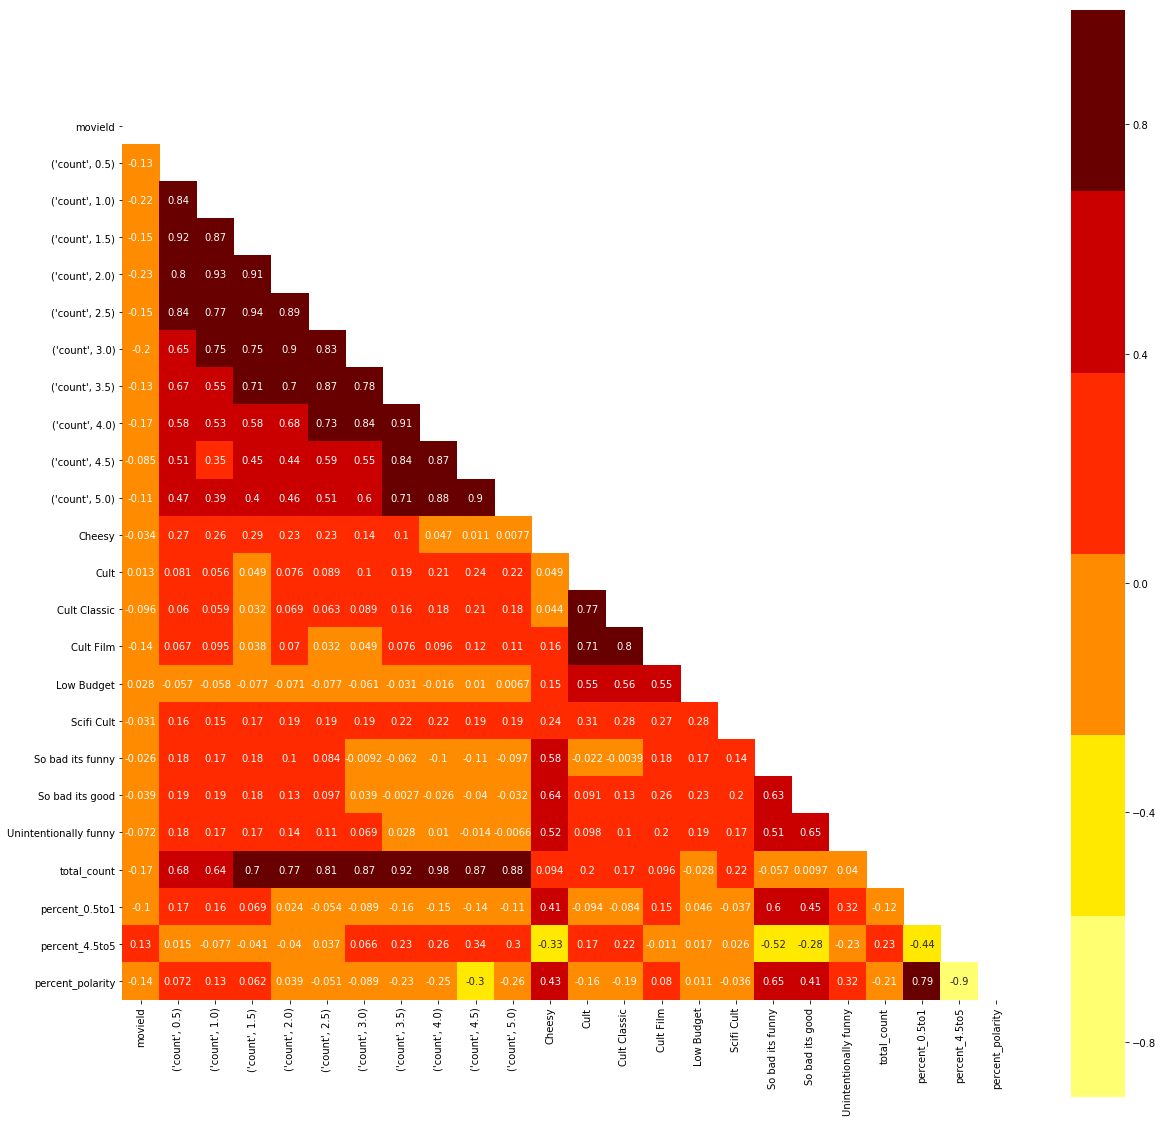

In [80]:
heatmap_corr(g_tag_test)

In [97]:
g_tag_test.describe()

movieId  (count, 0.5)  (count, 1.0)  (count, 1.5)  (count, 2.0)  \
count   13176.000000  13176.000000  13176.000000  13176.000000  13176.000000   
mean    39970.868549     32.205070     66.242107     32.641014    138.490893   
std     48151.129249     78.729075    177.559421     78.772207    336.595566   
min         1.000000      0.000000      0.000000      0.000000      0.000000   
25%      3680.750000      2.000000      3.000000      2.000000      8.000000   
50%      7880.000000      6.000000     10.000000      6.000000     24.000000   
75%     71249.000000     22.000000     48.000000     24.000000    104.250000   
max    187595.000000   1132.000000   4339.000000   1219.000000   5687.000000   

       (count, 2.5)  (count, 3.0)  (count, 3.5)  (count, 4.0)  (count, 4.5)  \
count  13176.000000  13176.000000  13176.000000  13176.000000  13176.000000   
mean     101.587583    413.346160    253.584624    556.950213    178.522162   
std      225.521414   1113.055995    620.117198   1648.780105    662.794569   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        8.000000     22.000000     17.000000     22.000000      6.000000   
50%       21.000000     66.000000     45.000000     69.000000     18.000000   
75%       77.000000    277.250000    168.000000    307.250000     80.000000   
max     3016.000000  22333.000000   7373.000000  28340.000000  14110.000000   

       (count, 5.0)        Cheesy          Cult  Cult Classic    Cult Film  \
count  13176.000000  13176.000000  13176.000000  13176.000000  13176.00000   
mean     307.286430      0.092009      0.125118      0.246457      0.28432   
std     1426.070242      0.106802      0.133213      0.200088      0.15842   
min        0.000000      0.007250      0.006250      0.018000      0.06175   
25%        7.000000      0.030000      0.041000      0.110750      0.17925   
50%       24.000000      0.052125      0.075500      0.171750      0.23475   
75%      111.000000      0.107000      0.155750      0.306875      0.33400   
max    48762.000000      0.847000      0.968000      0.994500      0.99325   

         Low Budget    Scifi Cult  So bad its funny  So bad its good  \
count  13176.000000  13176.000000      13176.000000     13176.000000   
mean       0.127759      0.059628          0.291982         0.035529   
std        0.151946      0.075956          0.164562         0.058301   
min        0.007000      0.004750          0.051000         0.003000   
25%        0.041750      0.028500          0.169750         0.011750   
50%        0.072625      0.039000          0.239250         0.018250   
75%        0.142250      0.057500          0.372250         0.034500   
max        0.988250      1.000000          0.952500         0.897500   

       Unintentionally funny   total_count  percent_0.5to1  percent_4.5to5  \
count           13176.000000  13176.000000    13176.000000    13176.000000   
mean                0.037644   2080.856254        0.073002        0.164994   
std                 0.055112   5655.243811        0.080848        0.111613   
min                 0.005250     48.000000        0.000000        0.000000   
25%                 0.014000    118.000000        0.026316        0.076610   
50%                 0.020000    345.000000        0.046220        0.140968   
75%                 0.036500   1354.000000        0.086957        0.230769   
max                 0.806750  97999.000000        0.848739        0.746776   

       percent_polarity   total_tails  
count      13176.000000  13176.000000  
mean          -0.091992      0.237995  
std            0.164058      0.105228  
min           -0.724502      0.015152  
25%           -0.196429      0.162431  
50%           -0.091985      0.217949  
75%            0.000000      0.292553  
max            0.827731      0.913043

In [170]:
g_tag_test.to_csv('first_ml_dataset.csv')

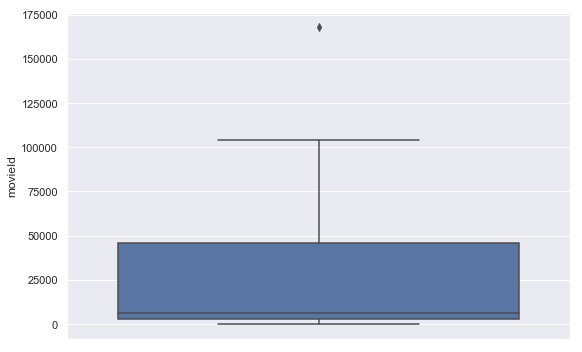

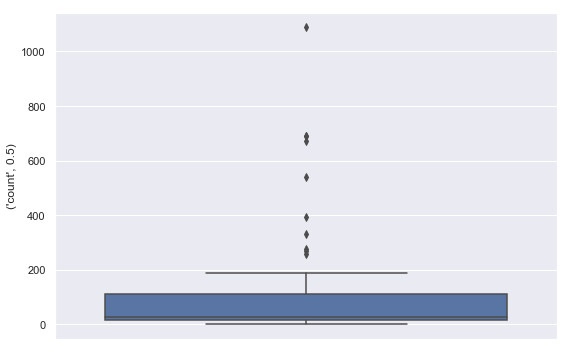

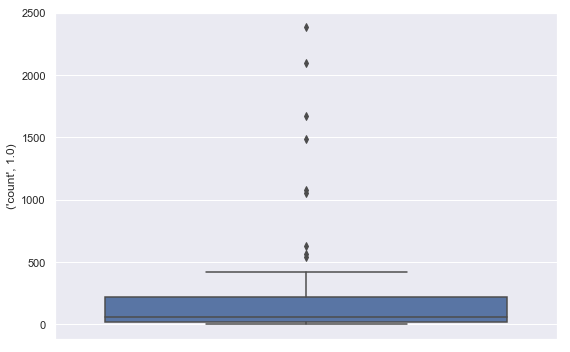

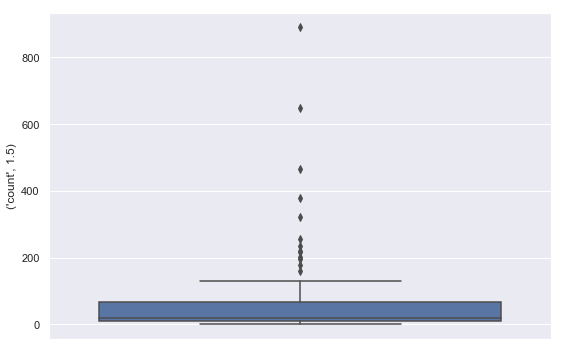

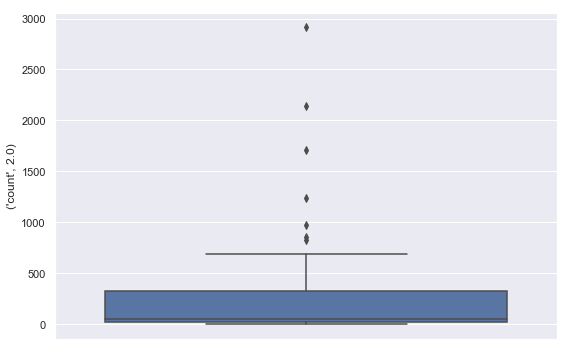

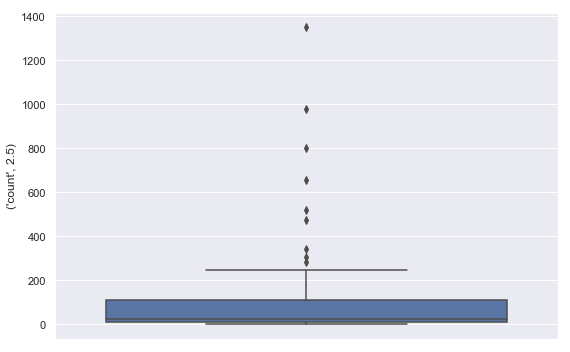

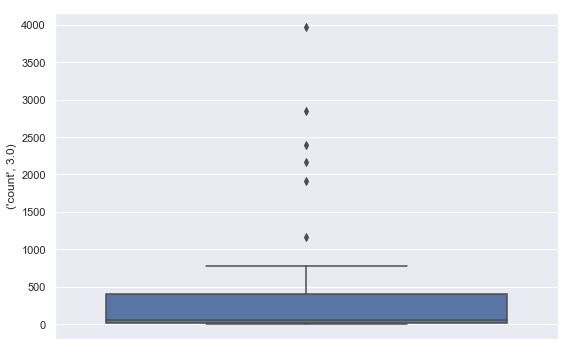

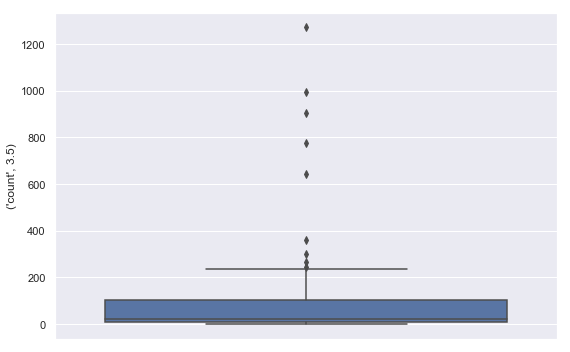

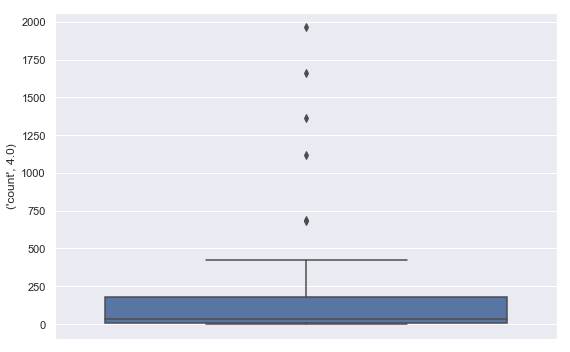

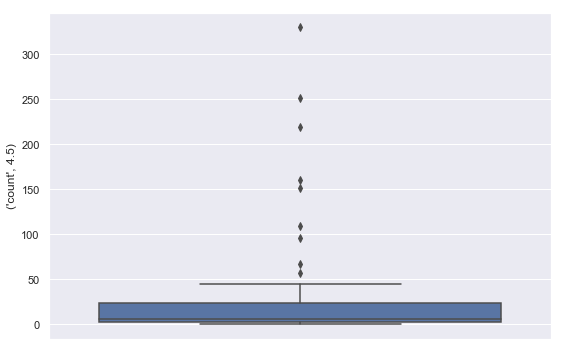

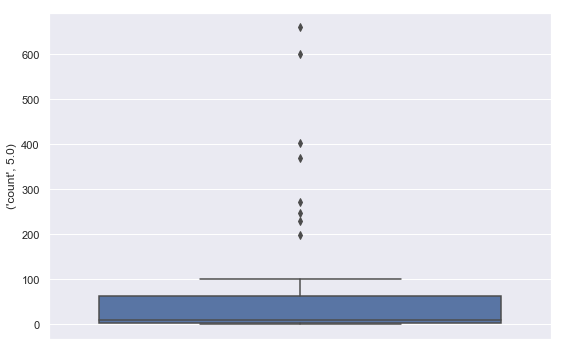

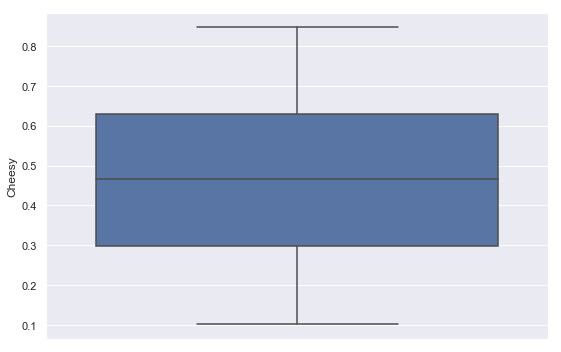

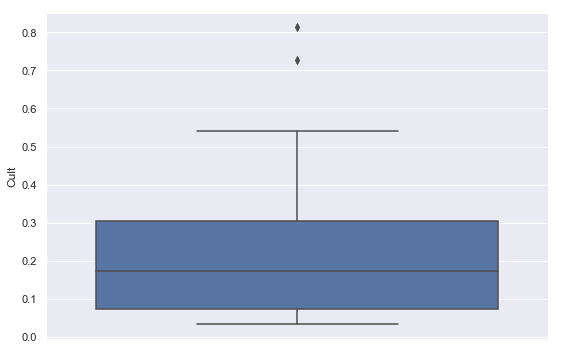

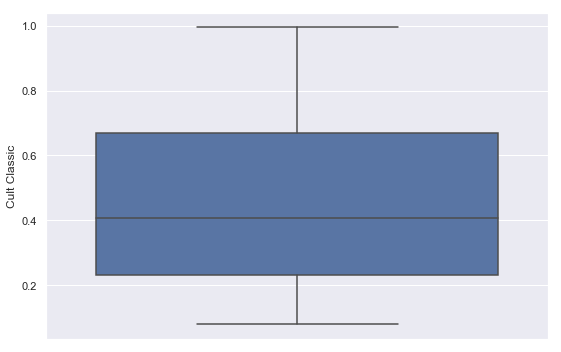

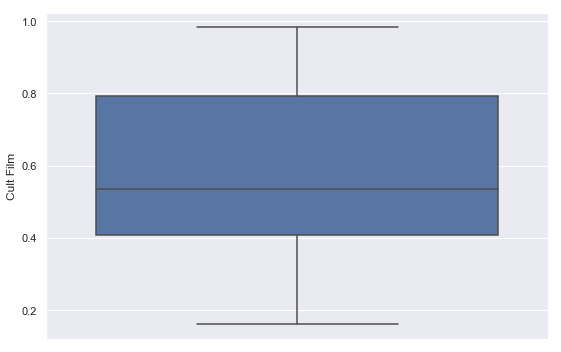

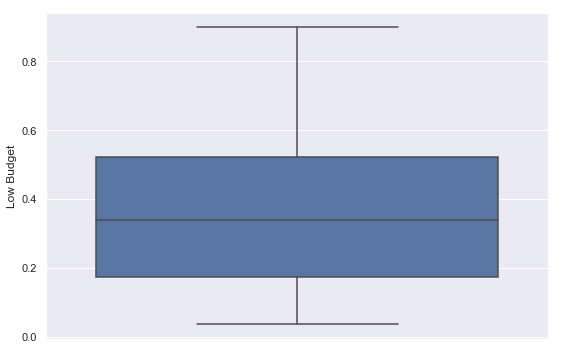

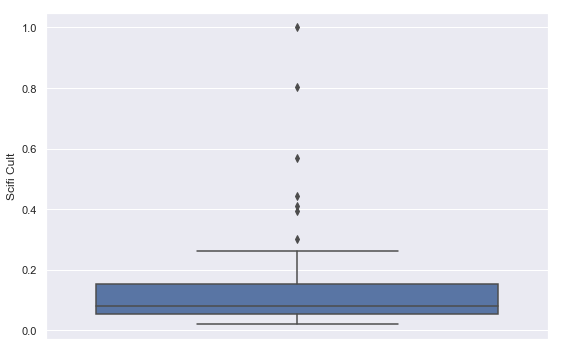

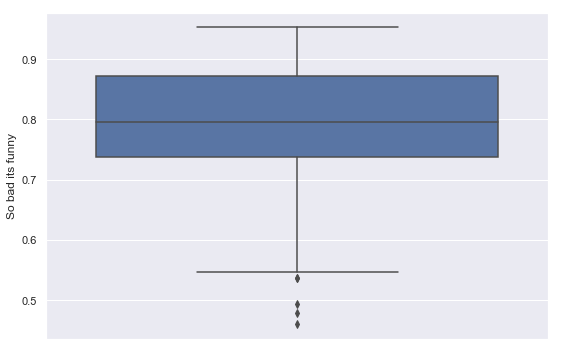

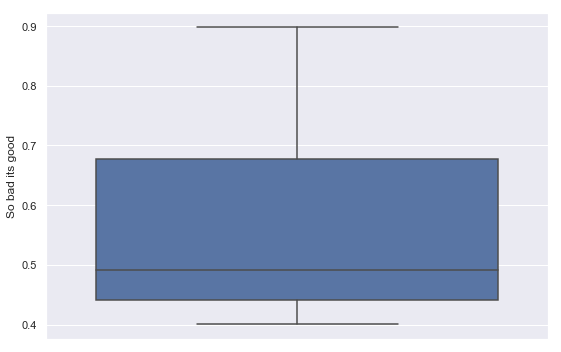

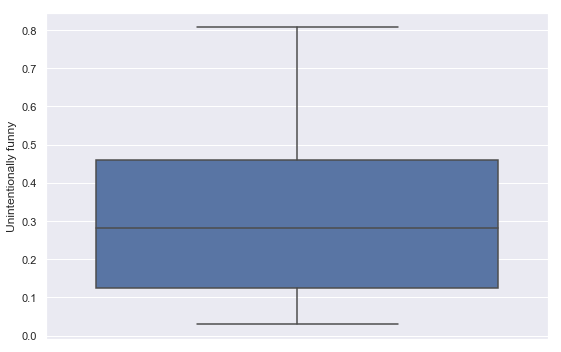

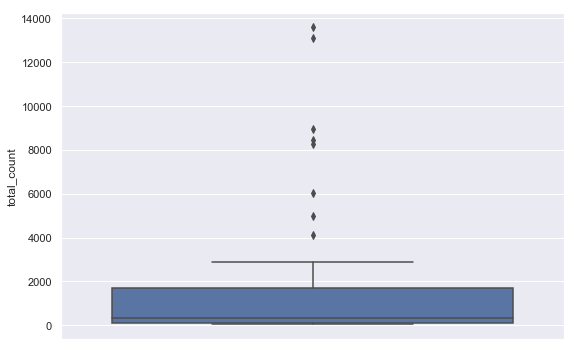

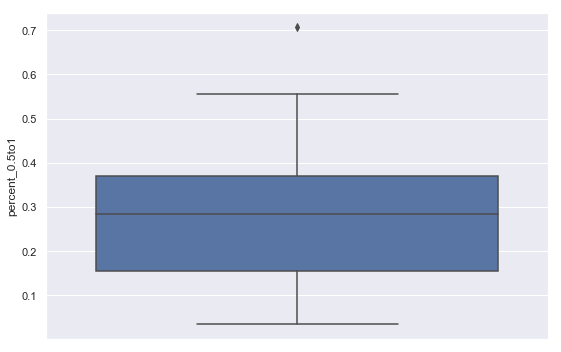

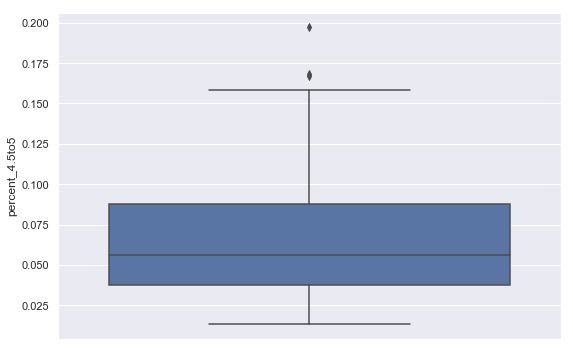

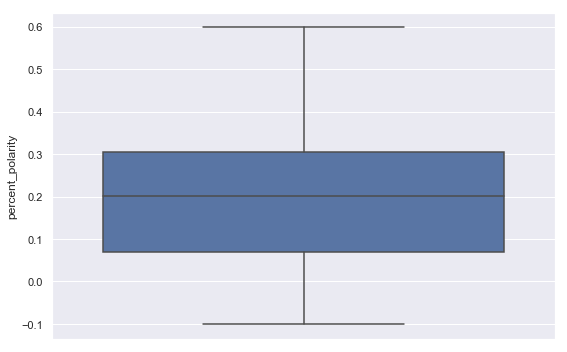

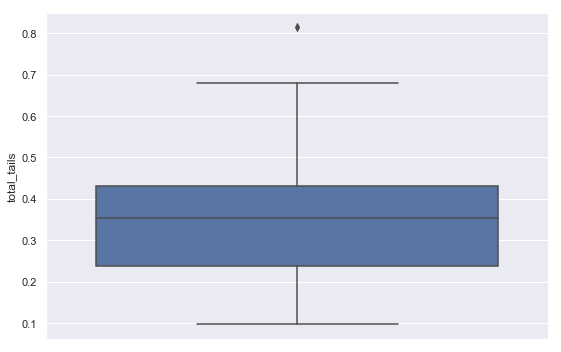

In [119]:
sns.set(rc={'figure.figsize':(9,6)})
for col in so_bad_its_good:
    ax = sns.boxplot(so_bad_its_good[col], orient='v')
    plt.show()

In [54]:
counts = []
columns = [('count', 0.5),('count', 1.0),('count', 1.5),
           ('count', 2.0),('count', 2.5),('count', 3.0),          
           ('count', 3.5),('count', 4.0),('count', 4.5),
           ('count', 5.0)]

for col in columns:
    counts.append(g_tag_test[col].sum())
counts

[424334.0,
 872806.0,
 430078.0,
 1824756.0,
 1338518.0,
 5446249.0,
 3341231.0,
 7338376.0,
 2352208.0,
 4048806.0]

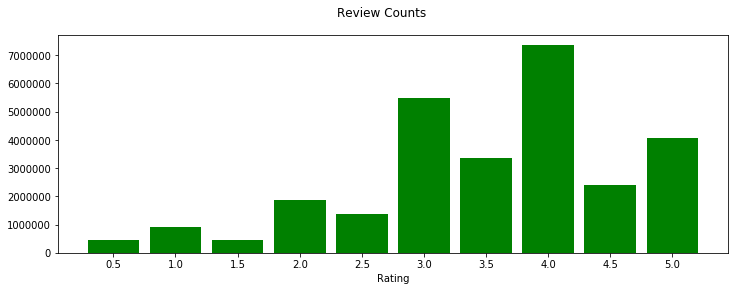

In [55]:
names = ['0.5','1.0','1.5','2.0','2.5','3.0','3.5','4.0','4.5','5.0']
values = counts

plt.figure(figsize=(12, 4))

plot = plt.bar(names, values)
plt.setp(plot,color='g', linewidth=2.0)
plt.suptitle('Review Counts')
plt.xlabel('Rating')
plt.show();

### Setting up dataframe for clustering. 

In [79]:
cluster_df = g_tag_test.drop(['title', 'genres','imdbId','tmdbId','So bad its funny','So bad its good','total_count'],axis=1)
cluster_df.set_index('movieId', inplace=True)
cluster_df.head()

(count, 0.5)  (count, 1.0)  (count, 1.5)  (count, 2.0)  (count, 2.5)  \
movieId                                                                         
1               478.0         840.0         468.0        2160.0        1665.0   
2               276.0         813.0         542.0        2551.0        1902.0   
3               174.0         777.0         237.0        1677.0         629.0   
4                48.0         352.0          31.0         497.0          77.0   
5               248.0         802.0         282.0        1737.0         681.0   

         (count, 3.0)  (count, 3.5)  (count, 4.0)  (count, 4.5)  (count, 5.0)  \
movieId                                                                         
1             11872.0        6095.0       22710.0        5684.0       16497.0   
2              8711.0        3116.0        6303.0         790.0        2139.0   
3              6227.0         774.0        3440.0         159.0        1491.0   
4              1136.0          68.0         557.0          12.0         211.0   
5              6655.0         761.0        2989.0         174.0        1145.0   

          Cheesy     Cult  Cult Classic  Cult Film  Low Budget  Scifi Cult  \
movieId                                                                      
1        0.07500  0.21400       0.30725    0.21925     0.07300     0.11750   
2        0.19625  0.11075       0.11025    0.19675     0.04200     0.04500   
3        0.06900  0.04100       0.10225    0.17550     0.02775     0.04600   
4        0.07775  0.04275       0.10675    0.21600     0.05475     0.02800   
5        0.08750  0.02750       0.08375    0.17825     0.02875     0.02925   

         Unintentionally funny  percent_0.5to1  percent_4.5to5  \
movieId                                                          
1                      0.01875        0.019250        0.323957   
2                      0.04200        0.040121        0.107910   
3                      0.03425        0.061020        0.105871   
4                      0.03725        0.133824        0.074607   
5                      0.03850        0.067856        0.085240   

         percent_polarity  total_tails  
movieId                                 
1               -0.304707     0.343206  
2               -0.067789     0.148031  
3               -0.044851     0.166891  
4                0.059217     0.208431  
5               -0.017384     0.153096

In [81]:
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13176 entries, 1 to 187595
Data columns (total 21 columns):
(count, 0.5)             13176 non-null float64
(count, 1.0)             13176 non-null float64
(count, 1.5)             13176 non-null float64
(count, 2.0)             13176 non-null float64
(count, 2.5)             13176 non-null float64
(count, 3.0)             13176 non-null float64
(count, 3.5)             13176 non-null float64
(count, 4.0)             13176 non-null float64
(count, 4.5)             13176 non-null float64
(count, 5.0)             13176 non-null float64
Cheesy                   13176 non-null float64
Cult                     13176 non-null float64
Cult Classic             13176 non-null float64
Cult Film                13176 non-null float64
Low Budget               13176 non-null float64
Scifi Cult               13176 non-null float64
Unintentionally funny    13176 non-null float64
percent_0.5to1           13176 non-null float64
percent_4.5to5           1

### Clustering EDA.

In [58]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KernelDensity
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn import metrics
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [59]:
import pprint
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as shc

In [82]:
cluster_df.shape

(13176, 21)

## Clustering proper attempts.

In [83]:
# Scaling to help minimize outliers for clustering. But is this necessary?
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cluster_df)
features_scaled = pd.DataFrame(data_scaled, columns=cluster_df.columns)

In [98]:
features_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13176 entries, 0 to 13175
Data columns (total 21 columns):
(count, 0.5)             13176 non-null float64
(count, 1.0)             13176 non-null float64
(count, 1.5)             13176 non-null float64
(count, 2.0)             13176 non-null float64
(count, 2.5)             13176 non-null float64
(count, 3.0)             13176 non-null float64
(count, 3.5)             13176 non-null float64
(count, 4.0)             13176 non-null float64
(count, 4.5)             13176 non-null float64
(count, 5.0)             13176 non-null float64
Cheesy                   13176 non-null float64
Cult                     13176 non-null float64
Cult Classic             13176 non-null float64
Cult Film                13176 non-null float64
Low Budget               13176 non-null float64
Scifi Cult               13176 non-null float64
Unintentionally funny    13176 non-null float64
percent_0.5to1           13176 non-null float64
percent_4.5to5           13

In [69]:
def agg_cluster(df,linkage='ward',distance='euclidean'):
    Z = shc.linkage(df,linkage,distance)
    
    c, coph_dists = cophenet(Z, pdist(df))
    print('Cophenet Correlation:',c)
    
    plt.title('Hierarchical Clustering Dendrogram (truncated)')
    plt.xlabel('No. of clusters')
    plt.ylabel('distance')
    dendrogram(
        Z,
        truncate_mode='lastp',  # show only the last p merged clusters
        p=12,  # show only the last p merged clusters
        leaf_rotation=90.,
        leaf_font_size=12.,
        show_contracted=True,  # to get a distribution impression in truncated branches
    )
    plt.show()
    
    #Shows the distance of the 12 final splits.
    print('Last 12 cluster distances:',Z[-12:,2])
    

In [70]:
def agg_clust(df,n,affinity,linkage):
    agg_clust = AgglomerativeClustering(n_clusters=n,affinity=affinity,linkage=linkage)
    assigned_clust = agg_clust.fit_predict(df)
    return agg_clust,assigned_clust
    
    
    

### 1. Ward's

Cophenet Correlation: 0.6279940607293204


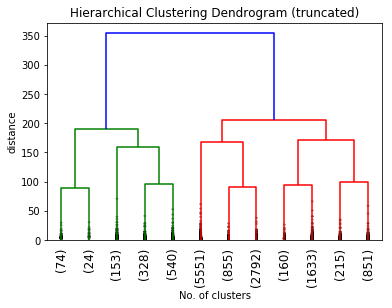

Last 12 cluster distances: [ 77.02723712  88.67961595  91.5432796   94.5463655   96.00827187
  98.54002825 159.26387754 167.32775043 171.93507768 189.40838107
 205.86838306 354.34902148]


In [85]:
agg_cluster(features_scaled)

In [87]:
ward_pred = agg_clust(features_scaled,n=3,affinity='euclidean',linkage='ward')
ward_pred

(AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
             connectivity=None, linkage='ward', memory=None, n_clusters=3,
             pooling_func='deprecated'), array([0, 0, 0, ..., 2, 2, 2]))

### 2. Average

Cophenet Correlation: 0.9232308755264229


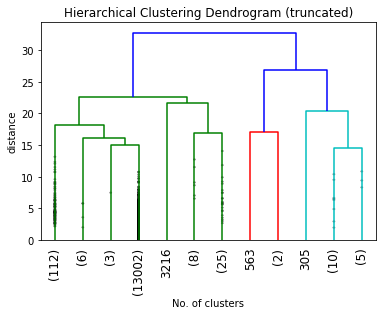

Last 12 cluster distances: [14.45864756 14.46736253 14.94659789 16.15950507 16.91160062 17.02724076
 18.22034759 20.38354203 21.70143917 22.68151496 26.92799832 32.81329853]


In [88]:
agg_cluster(features_scaled,'average')

In [89]:
average_pred = agg_clust(features_scaled,n=3,affinity='euclidean',linkage='average')
average_pred

(AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
             connectivity=None, linkage='average', memory=None,
             n_clusters=3, pooling_func='deprecated'),
 array([0, 0, 0, ..., 0, 0, 0]))

Cophenet Correlation: 0.8951164062350638


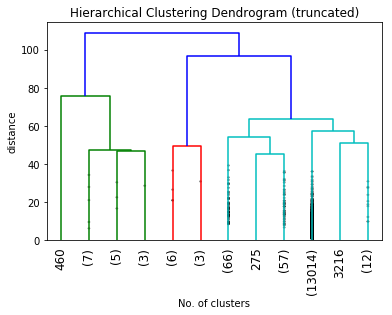

Last 12 cluster distances: [ 44.89877121  45.06480185  46.7985604   47.12292937  49.50653662
  50.97485844  54.20981488  57.19889113  63.41714743  75.79582521
  96.58089992 108.9043869 ]


In [90]:
agg_cluster(features_scaled,'average','cityblock')

In [91]:
avg_man_pred = agg_clust(features_scaled,n=4,affinity='cityblock',linkage='average')
avg_man_pred

(AgglomerativeClustering(affinity='cityblock', compute_full_tree='auto',
             connectivity=None, linkage='average', memory=None,
             n_clusters=4, pooling_func='deprecated'),
 array([0, 0, 0, ..., 0, 0, 0]))

### 3. Complete

Cophenet Correlation: 0.7589711958736106


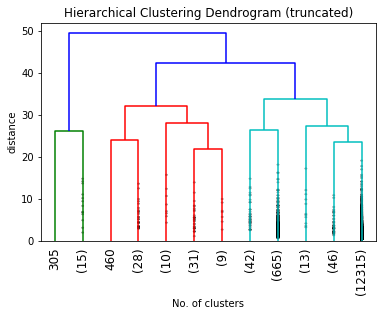

Last 12 cluster distances: [21.46739462 21.98156112 23.6026815  24.02779856 26.27454348 26.49920715
 27.26155014 28.13366034 32.04425466 33.8623715  42.50094524 49.47458586]


In [92]:
agg_cluster(features_scaled,'complete')

In [122]:
comp_pred = agg_clust(features_scaled,n=5,affinity='euclidean',linkage='complete')
comp_pred

(AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
             connectivity=None, linkage='complete', memory=None,
             n_clusters=5, pooling_func='deprecated'),
 array([1, 0, 1, ..., 2, 2, 2]))

Cophenet Correlation: 0.6062444287053101


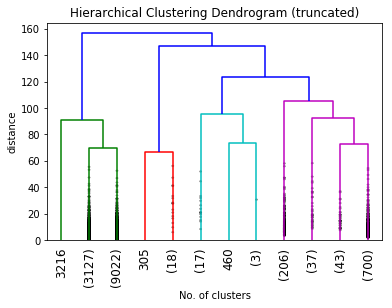

Last 12 cluster distances: [ 64.94427699  66.81788804  69.50243479  72.53894301  73.57987261
  91.24923778  92.38958753  95.72269364 105.47582914 123.27828222
 146.67252011 156.86375551]


In [94]:
agg_cluster(features_scaled,'complete','cityblock')

In [123]:
comp_man_pred = agg_clust(features_scaled,n=5,affinity='cityblock',linkage='complete')
comp_man_pred

(AgglomerativeClustering(affinity='cityblock', compute_full_tree='auto',
             connectivity=None, linkage='complete', memory=None,
             n_clusters=5, pooling_func='deprecated'),
 array([1, 4, 4, ..., 3, 3, 3]))

## Checking the clusters.

In [102]:
ward_pred[1]

array([0, 0, 0, ..., 2, 2, 2])

In [103]:
df_ward = g_tag_test.copy()
df_ward['Cluster'] = ward_pred[1]
df_ward.head(100)

movieId                                              title  \
0         1                                   Toy Story (1995)   
1         2                                     Jumanji (1995)   
2         3                            Grumpier Old Men (1995)   
3         4                           Waiting to Exhale (1995)   
4         5                 Father of the Bride Part II (1995)   
5         6                                        Heat (1995)   
6         7                                     Sabrina (1995)   
7         8                                Tom and Huck (1995)   
8         9                                Sudden Death (1995)   
9        10                                   GoldenEye (1995)   
10       11                     American President, The (1995)   
11       12                 Dracula: Dead and Loving It (1995)   
12       13                                       Balto (1995)   
13       14                                       Nixon (1995)   
14       15                            Cutthroat Island (1995)   
15       16                                      Casino (1995)   
16       17                       Sense and Sensibility (1995)   
17       18                                  Four Rooms (1995)   
18       19              Ace Ventura: When Nature Calls (1995)   
19       20                                 Money Train (1995)   
20       21                                  Get Shorty (1995)   
21       22                                     Copycat (1995)   
22       23                                   Assassins (1995)   
23       24                                      Powder (1995)   
24       25                           Leaving Las Vegas (1995)   
25       26                                     Othello (1995)   
26       27                                Now and Then (1995)   
27       28                                  Persuasion (1995)   
28       29  City of Lost Children, The (Cité des enfants p...   
29       30  Shanghai Triad (Yao a yao yao dao waipo qiao) ...   
30       31                             Dangerous Minds (1995)   
31       32          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
32       33                            Wings of Courage (1995)   
33       34                                        Babe (1995)   
34       35                                  Carrington (1995)   
35       36                            Dead Man Walking (1995)   
36       37                      Across the Sea of Time (1995)   
37       38                                It Takes Two (1995)   
38       39                                    Clueless (1995)   
39       40                    Cry, the Beloved Country (1995)   
40       41                                 Richard III (1995)   
41       42                             Dead Presidents (1995)   
42       43                                 Restoration (1995)   
43       44                               Mortal Kombat (1995)   
44       45                                  To Die For (1995)   
45       46               How to Make an American Quilt (1995)   
46       47                        Seven (a.k.a. Se7en) (1995)   
47       48                                  Pocahontas (1995)   
48       49                       When Night Is Falling (1995)   
49       50                         Usual Suspects, The (1995)   
50       52                            Mighty Aphrodite (1995)   
51       53                                    Lamerica (1994)   
52       54                              Big Green, The (1995)   
53       55                                     Georgia (1995)   
54       56                     Kids of the Round Table (1995)   
55       57                       Home for the Holidays (1995)   
56       58                  Postman, The (Postino, Il) (1994)   
57       59       Confessional, The (Confessionnal, Le) (1995)   
58       60                 Indian in the Cupboard, The (1995)   
59       61                              Eye

In [109]:
df_ward.loc[df_ward.Cluster == 0]

movieId                                              title  \
0            1                                   Toy Story (1995)   
1            2                                     Jumanji (1995)   
2            3                            Grumpier Old Men (1995)   
4            5                 Father of the Bride Part II (1995)   
5            6                                        Heat (1995)   
6            7                                     Sabrina (1995)   
9           10                                   GoldenEye (1995)   
10          11                     American President, The (1995)   
11          12                 Dracula: Dead and Loving It (1995)   
15          16                                      Casino (1995)   
16          17                       Sense and Sensibility (1995)   
18          19              Ace Ventura: When Nature Calls (1995)   
20          21                                  Get Shorty (1995)   
21          22                                     Copycat (1995)   
23          24                                      Powder (1995)   
24          25                           Leaving Las Vegas (1995)   
30          31                             Dangerous Minds (1995)   
31          32          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
33          34                                        Babe (1995)   
35          36                            Dead Man Walking (1995)   
38          39                                    Clueless (1995)   
43          44                               Mortal Kombat (1995)   
44          45                                  To Die For (1995)   
46          47                        Seven (a.k.a. Se7en) (1995)   
47          48                                  Pocahontas (1995)   
49          50                         Usual Suspects, The (1995)   
56          58                  Postman, The (Postino, Il) (1994)   
58          60                 Indian in the Cupboard, The (1995)   
60          62                          Mr. Holland's Opus (1995)   
63          65                                    Bio-Dome (1996)   
64          66          Lawnmower Man 2: Beyond Cyberspace (1996)   
68          70                         From Dusk Till Dawn (1996)   
86          88                                 Black Sheep (1996)   
92          95                                Broken Arrow (1996)   
101        104                               Happy Gilmore (1996)   
102        105              Bridges of Madison County, The (1995)   
104        107                      Muppet Treasure Island (1996)   
106        110                                  Braveheart (1995)   
107        111                                 Taxi Driver (1976)   
108        112         Rumble in the Bronx (Hont faan kui) (1995)   
128        135                              Down Periscope (1996)   
133        141                               Birdcage, The (1996)   
135        145                                    Bad Boys (1995)   
140        150                                   Apollo 13 (1995)   
141        151                                     Rob Roy (1995)   
143        153                              Batman Forever (1995)   
148        158                                      Casper (1995)   
150        160                                       Congo (1995)   
151        161                                Crimson Tide (1995)   
153        163                                   Desperado (1995)   
155        165                  Die Hard: With a Vengeance (1995)   
158        168                                First Knight (1995)   
159        169            Free Willy 2: The Adventure Home (1995)   
160        170                                     Hackers (1995)   
162        172                             Johnny Mnemonic (1995)   
163        173                                 Judge Dredd (1995)   
170        180                                    Mallrats (1995)   
171  

In [111]:
df_avg = g_tag_test.copy()
df_avg['Cluster'] = average_pred[1]
df_avg.head(100)

movieId                                              title  \
0         1                                   Toy Story (1995)   
1         2                                     Jumanji (1995)   
2         3                            Grumpier Old Men (1995)   
3         4                           Waiting to Exhale (1995)   
4         5                 Father of the Bride Part II (1995)   
5         6                                        Heat (1995)   
6         7                                     Sabrina (1995)   
7         8                                Tom and Huck (1995)   
8         9                                Sudden Death (1995)   
9        10                                   GoldenEye (1995)   
10       11                     American President, The (1995)   
11       12                 Dracula: Dead and Loving It (1995)   
12       13                                       Balto (1995)   
13       14                                       Nixon (1995)   
14       15                            Cutthroat Island (1995)   
15       16                                      Casino (1995)   
16       17                       Sense and Sensibility (1995)   
17       18                                  Four Rooms (1995)   
18       19              Ace Ventura: When Nature Calls (1995)   
19       20                                 Money Train (1995)   
20       21                                  Get Shorty (1995)   
21       22                                     Copycat (1995)   
22       23                                   Assassins (1995)   
23       24                                      Powder (1995)   
24       25                           Leaving Las Vegas (1995)   
25       26                                     Othello (1995)   
26       27                                Now and Then (1995)   
27       28                                  Persuasion (1995)   
28       29  City of Lost Children, The (Cité des enfants p...   
29       30  Shanghai Triad (Yao a yao yao dao waipo qiao) ...   
30       31                             Dangerous Minds (1995)   
31       32          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
32       33                            Wings of Courage (1995)   
33       34                                        Babe (1995)   
34       35                                  Carrington (1995)   
35       36                            Dead Man Walking (1995)   
36       37                      Across the Sea of Time (1995)   
37       38                                It Takes Two (1995)   
38       39                                    Clueless (1995)   
39       40                    Cry, the Beloved Country (1995)   
40       41                                 Richard III (1995)   
41       42                             Dead Presidents (1995)   
42       43                                 Restoration (1995)   
43       44                               Mortal Kombat (1995)   
44       45                                  To Die For (1995)   
45       46               How to Make an American Quilt (1995)   
46       47                        Seven (a.k.a. Se7en) (1995)   
47       48                                  Pocahontas (1995)   
48       49                       When Night Is Falling (1995)   
49       50                         Usual Suspects, The (1995)   
50       52                            Mighty Aphrodite (1995)   
51       53                                    Lamerica (1994)   
52       54                              Big Green, The (1995)   
53       55                                     Georgia (1995)   
54       56                     Kids of the Round Table (1995)   
55       57                       Home for the Holidays (1995)   
56       58                  Postman, The (Postino, Il) (1994)   
57       59       Confessional, The (Confessionnal, Le) (1995)   
58       60                 Indian in the Cupboard, The (1995)   
59       61                              Eye

In [112]:
df_avg.loc[df_avg.imdbId == 'tt0368226']

movieId             title                genres     imdbId tmdbId  \
10113    74754  Room, The (2003)  Comedy|Drama|Romance  tt0368226  17473   

       (count, 0.5)  (count, 1.0)  (count, 1.5)  (count, 2.0)  (count, 2.5)  \
10113         151.0          81.0          29.0          41.0          22.0   

       (count, 3.0)  (count, 3.5)  (count, 4.0)  (count, 4.5)  (count, 5.0)  \
10113          53.0          45.0          55.0          24.0          93.0   

        Cheesy    Cult  Cult Classic  Cult Film  Low Budget  Scifi Cult  \
10113  0.13125  0.2365         0.622     0.8735      0.4445      0.0655   

       So bad its funny  So bad its good  Unintentionally funny  total_count  \
10113            0.8505           0.8165                  0.781        594.0   

       percent_0.5to1  percent_4.5to5  percent_polarity  total_tails  Cluster  
10113        0.390572         0.19697          0.193603     0.587542        0

In [114]:
len(df_avg.loc[df_avg.Cluster == 0])

13157

In [116]:
df_avg_man = g_tag_test.copy()
df_avg_man['Cluster'] = avg_man_pred[1]
df_avg_man.head(100)

movieId                                              title  \
0         1                                   Toy Story (1995)   
1         2                                     Jumanji (1995)   
2         3                            Grumpier Old Men (1995)   
3         4                           Waiting to Exhale (1995)   
4         5                 Father of the Bride Part II (1995)   
5         6                                        Heat (1995)   
6         7                                     Sabrina (1995)   
7         8                                Tom and Huck (1995)   
8         9                                Sudden Death (1995)   
9        10                                   GoldenEye (1995)   
10       11                     American President, The (1995)   
11       12                 Dracula: Dead and Loving It (1995)   
12       13                                       Balto (1995)   
13       14                                       Nixon (1995)   
14       15                            Cutthroat Island (1995)   
15       16                                      Casino (1995)   
16       17                       Sense and Sensibility (1995)   
17       18                                  Four Rooms (1995)   
18       19              Ace Ventura: When Nature Calls (1995)   
19       20                                 Money Train (1995)   
20       21                                  Get Shorty (1995)   
21       22                                     Copycat (1995)   
22       23                                   Assassins (1995)   
23       24                                      Powder (1995)   
24       25                           Leaving Las Vegas (1995)   
25       26                                     Othello (1995)   
26       27                                Now and Then (1995)   
27       28                                  Persuasion (1995)   
28       29  City of Lost Children, The (Cité des enfants p...   
29       30  Shanghai Triad (Yao a yao yao dao waipo qiao) ...   
30       31                             Dangerous Minds (1995)   
31       32          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
32       33                            Wings of Courage (1995)   
33       34                                        Babe (1995)   
34       35                                  Carrington (1995)   
35       36                            Dead Man Walking (1995)   
36       37                      Across the Sea of Time (1995)   
37       38                                It Takes Two (1995)   
38       39                                    Clueless (1995)   
39       40                    Cry, the Beloved Country (1995)   
40       41                                 Richard III (1995)   
41       42                             Dead Presidents (1995)   
42       43                                 Restoration (1995)   
43       44                               Mortal Kombat (1995)   
44       45                                  To Die For (1995)   
45       46               How to Make an American Quilt (1995)   
46       47                        Seven (a.k.a. Se7en) (1995)   
47       48                                  Pocahontas (1995)   
48       49                       When Night Is Falling (1995)   
49       50                         Usual Suspects, The (1995)   
50       52                            Mighty Aphrodite (1995)   
51       53                                    Lamerica (1994)   
52       54                              Big Green, The (1995)   
53       55                                     Georgia (1995)   
54       56                     Kids of the Round Table (1995)   
55       57                       Home for the Holidays (1995)   
56       58                  Postman, The (Postino, Il) (1994)   
57       59       Confessional, The (Confessionnal, Le) (1995)   
58       60                 Indian in the Cupboard, The (1995)   
59       61                              Eye

In [121]:
df_avg_man.loc[df_avg_man.Cluster == 3]

movieId                 title                            genres  \
460      480  Jurassic Park (1993)  Action|Adventure|Sci-Fi|Thriller   

        imdbId tmdbId  (count, 0.5)  (count, 1.0)  (count, 1.5)  (count, 2.0)  \
460  tt0107290    329         424.0        1233.0         609.0        4028.0   

     (count, 2.5)  (count, 3.0)  (count, 3.5)  (count, 4.0)  (count, 4.5)  \
460        2645.0       18622.0        7373.0       23970.0        4236.0   

     (count, 5.0)  Cheesy     Cult  Cult Classic  Cult Film  Low Budget  \
460       13311.0   0.278  0.64025       0.53375      0.496     0.11825   

     Scifi Cult  So bad its funny  So bad its good  Unintentionally funny  \
460     0.33575           0.28025          0.04225                  0.082   

     total_count  percent_0.5to1  percent_4.5to5  percent_polarity  \
460      76451.0        0.021674         0.22952         -0.207846   

     total_tails  Cluster  
460     0.251194        3

In [124]:
df_comp = g_tag_test.copy()
df_comp['Cluster'] = comp_pred[1]
df_comp.head(100)

movieId                                              title  \
0         1                                   Toy Story (1995)   
1         2                                     Jumanji (1995)   
2         3                            Grumpier Old Men (1995)   
3         4                           Waiting to Exhale (1995)   
4         5                 Father of the Bride Part II (1995)   
5         6                                        Heat (1995)   
6         7                                     Sabrina (1995)   
7         8                                Tom and Huck (1995)   
8         9                                Sudden Death (1995)   
9        10                                   GoldenEye (1995)   
10       11                     American President, The (1995)   
11       12                 Dracula: Dead and Loving It (1995)   
12       13                                       Balto (1995)   
13       14                                       Nixon (1995)   
14       15                            Cutthroat Island (1995)   
15       16                                      Casino (1995)   
16       17                       Sense and Sensibility (1995)   
17       18                                  Four Rooms (1995)   
18       19              Ace Ventura: When Nature Calls (1995)   
19       20                                 Money Train (1995)   
20       21                                  Get Shorty (1995)   
21       22                                     Copycat (1995)   
22       23                                   Assassins (1995)   
23       24                                      Powder (1995)   
24       25                           Leaving Las Vegas (1995)   
25       26                                     Othello (1995)   
26       27                                Now and Then (1995)   
27       28                                  Persuasion (1995)   
28       29  City of Lost Children, The (Cité des enfants p...   
29       30  Shanghai Triad (Yao a yao yao dao waipo qiao) ...   
30       31                             Dangerous Minds (1995)   
31       32          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
32       33                            Wings of Courage (1995)   
33       34                                        Babe (1995)   
34       35                                  Carrington (1995)   
35       36                            Dead Man Walking (1995)   
36       37                      Across the Sea of Time (1995)   
37       38                                It Takes Two (1995)   
38       39                                    Clueless (1995)   
39       40                    Cry, the Beloved Country (1995)   
40       41                                 Richard III (1995)   
41       42                             Dead Presidents (1995)   
42       43                                 Restoration (1995)   
43       44                               Mortal Kombat (1995)   
44       45                                  To Die For (1995)   
45       46               How to Make an American Quilt (1995)   
46       47                        Seven (a.k.a. Se7en) (1995)   
47       48                                  Pocahontas (1995)   
48       49                       When Night Is Falling (1995)   
49       50                         Usual Suspects, The (1995)   
50       52                            Mighty Aphrodite (1995)   
51       53                                    Lamerica (1994)   
52       54                              Big Green, The (1995)   
53       55                                     Georgia (1995)   
54       56                     Kids of the Round Table (1995)   
55       57                       Home for the Holidays (1995)   
56       58                  Postman, The (Postino, Il) (1994)   
57       59       Confessional, The (Confessionnal, Le) (1995)   
58       60                 Indian in the Cupboard, The (1995)   
59       61                              Eye

In [133]:
df_comp.loc[df_comp.Cluster == 0]

movieId                                              title  \
1           2                                     Jumanji (1995)   
18         19              Ace Ventura: When Nature Calls (1995)   
47         48                                  Pocahontas (1995)   
92         95                                Broken Arrow (1996)   
143       153                              Batman Forever (1995)   
148       158                                      Casper (1995)   
162       172                             Johnny Mnemonic (1995)   
163       173                                 Judge Dredd (1995)   
175       185                                    Net, The (1995)   
186       196                                     Species (1995)   
198       208                                  Waterworld (1995)   
219       231             Dumb & Dumber (Dumb and Dumber) (1994)   
275       288                        Natural Born Killers (1994)   
330       344                  Ace Ventura: Pet Detective (1994)   
341       355                            Flintstones, The (1994)   
353       367                                   Mask, The (1994)   
356       370          Naked Gun 33 1/3: The Final Insult (1994)   
390       410                        Addams Family Values (1993)   
400       420                       Beverly Hills Cop III (1994)   
412       432  City Slickers II: The Legend of Curly's Gold (...   
414       434                                 Cliffhanger (1993)   
415       435                                   Coneheads (1993)   
422       442                              Demolition Man (1993)   
465       485                            Last Action Hero (1993)   
558       586                                  Home Alone (1990)   
678       736                                     Twister (1996)   
697       762                                  Striptease (1996)   
709       780               Independence Day (a.k.a. ID4) (1996)   
713       784                              Cable Guy, The (1996)   
717       788                        Nutty Professor, The (1996)   
1259     1391                               Mars Attacks! (1996)   
1339     1485                                   Liar Liar (1997)   
1384     1544              Lost World: Jurassic Park, The (1997)   
1391     1552                                     Con Air (1997)   
1405     1573                                    Face/Off (1997)   
1498     1676                           Starship Troopers (1997)   
1532     1721                                     Titanic (1997)   
1682     1917                                  Armageddon (1998)   
1777     2012                 Back to the Future Part III (1990)   
1818     2054                    Honey, I Shrunk the Kids (1989)   
2341     2617                                  Mummy, The (1999)   
2351     2628   Star Wars: Episode I - The Phantom Menace (1999)   
2402     2683       Austin Powers: The Spy Who Shagged Me (1999)   
2416     2699                               Arachnophobia (1990)   
2418     2701                              Wild Wild West (1999)   
2422     2706                                American Pie (1999)   
2426     2710                    Blair Witch Project, The (1999)   
3243     3623                      Mission: Impossible II (2000)   
3569     3977                            Charlie's Angels (2000)   
4827     5378  Star Wars: Episode II - Attack of the Clones (...   

                                               genres     imdbId tmdbId  \
1                          Adventure|Children|Fantasy  tt0113497   8844   
18                                             Comedy  tt0112281   9273   
47           Animation|Children|Drama|Musical|Romance  tt0114148  10530   
92                          Action|Adventure|Thriller  tt0115759   9208   
143                     Action|Adventure|Comedy|Crime  tt0112462    414   
148                                Adventure|Children  tt0112642   8839   
162         

In [134]:
df_comp_man = g_tag_test.copy()
df_comp_man['Cluster'] = comp_man_pred[1]
df_comp_man.head(100)

movieId                                              title  \
0         1                                   Toy Story (1995)   
1         2                                     Jumanji (1995)   
2         3                            Grumpier Old Men (1995)   
3         4                           Waiting to Exhale (1995)   
4         5                 Father of the Bride Part II (1995)   
5         6                                        Heat (1995)   
6         7                                     Sabrina (1995)   
7         8                                Tom and Huck (1995)   
8         9                                Sudden Death (1995)   
9        10                                   GoldenEye (1995)   
10       11                     American President, The (1995)   
11       12                 Dracula: Dead and Loving It (1995)   
12       13                                       Balto (1995)   
13       14                                       Nixon (1995)   
14       15                            Cutthroat Island (1995)   
15       16                                      Casino (1995)   
16       17                       Sense and Sensibility (1995)   
17       18                                  Four Rooms (1995)   
18       19              Ace Ventura: When Nature Calls (1995)   
19       20                                 Money Train (1995)   
20       21                                  Get Shorty (1995)   
21       22                                     Copycat (1995)   
22       23                                   Assassins (1995)   
23       24                                      Powder (1995)   
24       25                           Leaving Las Vegas (1995)   
25       26                                     Othello (1995)   
26       27                                Now and Then (1995)   
27       28                                  Persuasion (1995)   
28       29  City of Lost Children, The (Cité des enfants p...   
29       30  Shanghai Triad (Yao a yao yao dao waipo qiao) ...   
30       31                             Dangerous Minds (1995)   
31       32          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
32       33                            Wings of Courage (1995)   
33       34                                        Babe (1995)   
34       35                                  Carrington (1995)   
35       36                            Dead Man Walking (1995)   
36       37                      Across the Sea of Time (1995)   
37       38                                It Takes Two (1995)   
38       39                                    Clueless (1995)   
39       40                    Cry, the Beloved Country (1995)   
40       41                                 Richard III (1995)   
41       42                             Dead Presidents (1995)   
42       43                                 Restoration (1995)   
43       44                               Mortal Kombat (1995)   
44       45                                  To Die For (1995)   
45       46               How to Make an American Quilt (1995)   
46       47                        Seven (a.k.a. Se7en) (1995)   
47       48                                  Pocahontas (1995)   
48       49                       When Night Is Falling (1995)   
49       50                         Usual Suspects, The (1995)   
50       52                            Mighty Aphrodite (1995)   
51       53                                    Lamerica (1994)   
52       54                              Big Green, The (1995)   
53       55                                     Georgia (1995)   
54       56                     Kids of the Round Table (1995)   
55       57                       Home for the Holidays (1995)   
56       58                  Postman, The (Postino, Il) (1994)   
57       59       Confessional, The (Confessionnal, Le) (1995)   
58       60                 Indian in the Cupboard, The (1995)   
59       61                              Eye

In [138]:
df_comp_man.loc[df_comp_man.Cluster == 1]

movieId                                              title  \
0            1                                   Toy Story (1995)   
5            6                                        Heat (1995)   
6            7                                     Sabrina (1995)   
9           10                                   GoldenEye (1995)   
10          11                     American President, The (1995)   
15          16                                      Casino (1995)   
16          17                       Sense and Sensibility (1995)   
20          21                                  Get Shorty (1995)   
21          22                                     Copycat (1995)   
23          24                                      Powder (1995)   
24          25                           Leaving Las Vegas (1995)   
28          29  City of Lost Children, The (Cité des enfants p...   
30          31                             Dangerous Minds (1995)   
31          32          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
35          36                            Dead Man Walking (1995)   
56          58                  Postman, The (Postino, Il) (1994)   
58          60                 Indian in the Cupboard, The (1995)   
60          62                          Mr. Holland's Opus (1995)   
68          70                         From Dusk Till Dawn (1996)   
102        105              Bridges of Madison County, The (1995)   
104        107                      Muppet Treasure Island (1996)   
106        110                                  Braveheart (1995)   
107        111                                 Taxi Driver (1976)   
108        112         Rumble in the Bronx (Hont faan kui) (1995)   
128        135                              Down Periscope (1996)   
133        141                               Birdcage, The (1996)   
140        150                                   Apollo 13 (1995)   
141        151                                     Rob Roy (1995)   
151        161                                Crimson Tide (1995)   
153        163                                   Desperado (1995)   
155        165                  Die Hard: With a Vengeance (1995)   
205        215                              Before Sunrise (1995)   
206        216                               Billy Madison (1995)   
212        223                                      Clerks (1994)   
214        225                                  Disclosure (1994)   
223        235                                     Ed Wood (1994)   
224        236                                 French Kiss (1995)   
234        246                                 Hoop Dreams (1994)   
240        252                                        I.Q. (1994)   
241        253  Interview with the Vampire: The Vampire Chroni...   
249        261                                Little Women (1994)   
253        265  Like Water for Chocolate (Como agua para choco...   
254        266                         Legends of the Fall (1994)   
261        273  Mary Shelley's Frankenstein (Frankenstein) (1994)   
265        277                      Miracle on 34th Street (1994)   
270        282                                        Nell (1994)   
275        288                        Natural Born Killers (1994)   
279        292                                    Outbreak (1995)   
280        293  Léon: The Professional (a.k.a. The Professiona...   
287        300                                   Quiz Show (1994)   
293        306   Three Colors: Red (Trois couleurs: Rouge) (1994)   
294        307   Three Colors: Blue (Trois couleurs: Bleu) (1993)   
303        316                                    Stargate (1994)   
315        329                      Star Trek: Generations (1994)   
319        333                                   Tommy Boy (1995)   
323        337                 What's Eating Gilbert Grape (1993)   
325        339                     While You Were Sleeping (1995)   
328  

## Trying again.

In [140]:
cols = ['Cheesy','Cult','Cult Classic','Cult Film','Low Budget','Scifi Cult','Unintentionally funny','percent_0.5to1','percent_4.5to5','percent_polarity','total_tails']
cluster_df_2 = cluster_df[cols]
cluster_df_2.head()

Cheesy     Cult  Cult Classic  Cult Film  Low Budget  Scifi Cult  \
movieId                                                                      
1        0.07500  0.21400       0.30725    0.21925     0.07300     0.11750   
2        0.19625  0.11075       0.11025    0.19675     0.04200     0.04500   
3        0.06900  0.04100       0.10225    0.17550     0.02775     0.04600   
4        0.07775  0.04275       0.10675    0.21600     0.05475     0.02800   
5        0.08750  0.02750       0.08375    0.17825     0.02875     0.02925   

         Unintentionally funny  percent_0.5to1  percent_4.5to5  \
movieId                                                          
1                      0.01875        0.019250        0.323957   
2                      0.04200        0.040121        0.107910   
3                      0.03425        0.061020        0.105871   
4                      0.03725        0.133824        0.074607   
5                      0.03850        0.067856        0.085240   

         percent_polarity  total_tails  
movieId                                 
1               -0.304707     0.343206  
2               -0.067789     0.148031  
3               -0.044851     0.166891  
4                0.059217     0.208431  
5               -0.017384     0.153096

In [141]:
scaler = StandardScaler()
data_scaled_2 = scaler.fit_transform(cluster_df_2)
features_scaled_2 = pd.DataFrame(data_scaled_2, columns=cluster_df_2.columns)

### Round 2.

Cophenet Correlation: 0.49463446278367834


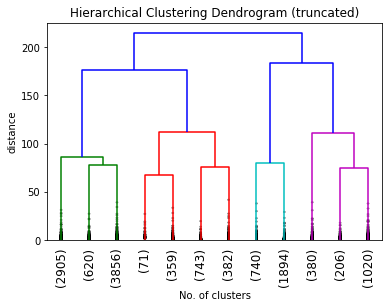

Last 12 cluster distances: [ 61.64050463  67.49420588  74.86143701  75.36707294  78.26875956
  79.53183001  86.51394313 111.51743445 112.5713579  176.13134332
 184.00508926 214.79717285]


In [142]:
agg_cluster(features_scaled_2)

Cophenet Correlation: 0.8496979744479142


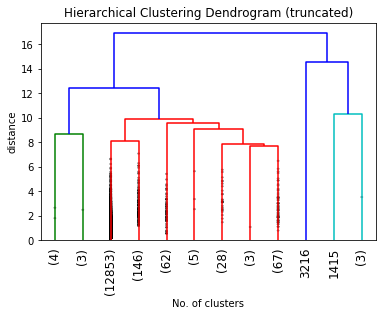

Last 12 cluster distances: [ 7.49591811  7.7403478   7.85539496  8.15049889  8.69623909  9.07845355
  9.59804354  9.89647468 10.31434222 12.40617885 14.58171124 16.89722952]


In [143]:
agg_cluster(features_scaled_2,'average')

In [144]:
agg_avg,as_avg = agg_clust(features_scaled_2,n=5,affinity='euclidean',linkage='average')
df_avg_2 = g_tag_test.copy()
df_avg_2['Cluster'] = as_avg[1]
df_avg_2.head(100)

movieId                                              title  \
0         1                                   Toy Story (1995)   
1         2                                     Jumanji (1995)   
2         3                            Grumpier Old Men (1995)   
3         4                           Waiting to Exhale (1995)   
4         5                 Father of the Bride Part II (1995)   
5         6                                        Heat (1995)   
6         7                                     Sabrina (1995)   
7         8                                Tom and Huck (1995)   
8         9                                Sudden Death (1995)   
9        10                                   GoldenEye (1995)   
10       11                     American President, The (1995)   
11       12                 Dracula: Dead and Loving It (1995)   
12       13                                       Balto (1995)   
13       14                                       Nixon (1995)   
14       15                            Cutthroat Island (1995)   
15       16                                      Casino (1995)   
16       17                       Sense and Sensibility (1995)   
17       18                                  Four Rooms (1995)   
18       19              Ace Ventura: When Nature Calls (1995)   
19       20                                 Money Train (1995)   
20       21                                  Get Shorty (1995)   
21       22                                     Copycat (1995)   
22       23                                   Assassins (1995)   
23       24                                      Powder (1995)   
24       25                           Leaving Las Vegas (1995)   
25       26                                     Othello (1995)   
26       27                                Now and Then (1995)   
27       28                                  Persuasion (1995)   
28       29  City of Lost Children, The (Cité des enfants p...   
29       30  Shanghai Triad (Yao a yao yao dao waipo qiao) ...   
30       31                             Dangerous Minds (1995)   
31       32          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
32       33                            Wings of Courage (1995)   
33       34                                        Babe (1995)   
34       35                                  Carrington (1995)   
35       36                            Dead Man Walking (1995)   
36       37                      Across the Sea of Time (1995)   
37       38                                It Takes Two (1995)   
38       39                                    Clueless (1995)   
39       40                    Cry, the Beloved Country (1995)   
40       41                                 Richard III (1995)   
41       42                             Dead Presidents (1995)   
42       43                                 Restoration (1995)   
43       44                               Mortal Kombat (1995)   
44       45                                  To Die For (1995)   
45       46               How to Make an American Quilt (1995)   
46       47                        Seven (a.k.a. Se7en) (1995)   
47       48                                  Pocahontas (1995)   
48       49                       When Night Is Falling (1995)   
49       50                         Usual Suspects, The (1995)   
50       52                            Mighty Aphrodite (1995)   
51       53                                    Lamerica (1994)   
52       54                              Big Green, The (1995)   
53       55                                     Georgia (1995)   
54       56                     Kids of the Round Table (1995)   
55       57                       Home for the Holidays (1995)   
56       58                  Postman, The (Postino, Il) (1994)   
57       59       Confessional, The (Confessionnal, Le) (1995)   
58       60                 Indian in the Cupboard, The (1995)   
59       61                              Eye

In [145]:
avg_labels = agg_avg.labels_

In [148]:
def cluster_scores(df,labels):
    print("Calinski-Harabaz: ",metrics.calinski_harabaz_score(df,labels))
    print("Silhouette: ", metrics.silhouette_score(df,labels))

In [149]:
cluster_scores(cluster_df_2,avg_labels)

Calinski-Harabaz:  22.865534207084337
Silhouette:  0.5429271671004213


In [150]:
df_avg_2.loc[df_avg_2.imdbId == 'tt0368226']

movieId             title                genres     imdbId tmdbId  \
10113    74754  Room, The (2003)  Comedy|Drama|Romance  tt0368226  17473   

       (count, 0.5)  (count, 1.0)  (count, 1.5)  (count, 2.0)  (count, 2.5)  \
10113         151.0          81.0          29.0          41.0          22.0   

       (count, 3.0)  (count, 3.5)  (count, 4.0)  (count, 4.5)  (count, 5.0)  \
10113          53.0          45.0          55.0          24.0          93.0   

        Cheesy    Cult  Cult Classic  Cult Film  Low Budget  Scifi Cult  \
10113  0.13125  0.2365         0.622     0.8735      0.4445      0.0655   

       So bad its funny  So bad its good  Unintentionally funny  total_count  \
10113            0.8505           0.8165                  0.781        594.0   

       percent_0.5to1  percent_4.5to5  percent_polarity  total_tails  Cluster  
10113        0.390572         0.19697          0.193603     0.587542        0

In [151]:
df_avg_2.loc[df_avg_2.Cluster == 0]

movieId                                              title  \
0            1                                   Toy Story (1995)   
1            2                                     Jumanji (1995)   
2            3                            Grumpier Old Men (1995)   
3            4                           Waiting to Exhale (1995)   
4            5                 Father of the Bride Part II (1995)   
5            6                                        Heat (1995)   
6            7                                     Sabrina (1995)   
7            8                                Tom and Huck (1995)   
8            9                                Sudden Death (1995)   
9           10                                   GoldenEye (1995)   
10          11                     American President, The (1995)   
11          12                 Dracula: Dead and Loving It (1995)   
12          13                                       Balto (1995)   
13          14                                       Nixon (1995)   
14          15                            Cutthroat Island (1995)   
15          16                                      Casino (1995)   
16          17                       Sense and Sensibility (1995)   
17          18                                  Four Rooms (1995)   
18          19              Ace Ventura: When Nature Calls (1995)   
19          20                                 Money Train (1995)   
20          21                                  Get Shorty (1995)   
21          22                                     Copycat (1995)   
22          23                                   Assassins (1995)   
23          24                                      Powder (1995)   
24          25                           Leaving Las Vegas (1995)   
25          26                                     Othello (1995)   
26          27                                Now and Then (1995)   
27          28                                  Persuasion (1995)   
28          29  City of Lost Children, The (Cité des enfants p...   
29          30  Shanghai Triad (Yao a yao yao dao waipo qiao) ...   
30          31                             Dangerous Minds (1995)   
31          32          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
32          33                            Wings of Courage (1995)   
33          34                                        Babe (1995)   
34          35                                  Carrington (1995)   
35          36                            Dead Man Walking (1995)   
36          37                      Across the Sea of Time (1995)   
37          38                                It Takes Two (1995)   
38          39                                    Clueless (1995)   
39          40                    Cry, the Beloved Country (1995)   
40          41                                 Richard III (1995)   
41          42                             Dead Presidents (1995)   
42          43                                 Restoration (1995)   
43          44                               Mortal Kombat (1995)   
44          45                                  To Die For (1995)   
45          46               How to Make an American Quilt (1995)   
46          47                        Seven (a.k.a. Se7en) (1995)   
47          48                                  Pocahontas (1995)   
48          49                       When Night Is Falling (1995)   
49          50                         Usual Suspects, The (1995)   
50          52                            Mighty Aphrodite (1995)   
51          53                                    Lamerica (1994)   
52          54                              Big Green, The (1995)   
53          55                                     Georgia (1995)   
54          56                     Kids of the Round Table (1995)   
55          57                       Home for the Holidays (1995)   
56          58                  Postman, The (Postino, Il) (1994)   
57   

In [153]:
avg_pred_3 = agg_clust(features_scaled_2,n=4,affinity='euclidean',linkage='average')
df_avg_3 = g_tag_test.copy()
df_avg_3['Cluster'] = avg_pred_3[1]
df_avg_3.head(100)

movieId                                              title  \
0         1                                   Toy Story (1995)   
1         2                                     Jumanji (1995)   
2         3                            Grumpier Old Men (1995)   
3         4                           Waiting to Exhale (1995)   
4         5                 Father of the Bride Part II (1995)   
5         6                                        Heat (1995)   
6         7                                     Sabrina (1995)   
7         8                                Tom and Huck (1995)   
8         9                                Sudden Death (1995)   
9        10                                   GoldenEye (1995)   
10       11                     American President, The (1995)   
11       12                 Dracula: Dead and Loving It (1995)   
12       13                                       Balto (1995)   
13       14                                       Nixon (1995)   
14       15                            Cutthroat Island (1995)   
15       16                                      Casino (1995)   
16       17                       Sense and Sensibility (1995)   
17       18                                  Four Rooms (1995)   
18       19              Ace Ventura: When Nature Calls (1995)   
19       20                                 Money Train (1995)   
20       21                                  Get Shorty (1995)   
21       22                                     Copycat (1995)   
22       23                                   Assassins (1995)   
23       24                                      Powder (1995)   
24       25                           Leaving Las Vegas (1995)   
25       26                                     Othello (1995)   
26       27                                Now and Then (1995)   
27       28                                  Persuasion (1995)   
28       29  City of Lost Children, The (Cité des enfants p...   
29       30  Shanghai Triad (Yao a yao yao dao waipo qiao) ...   
30       31                             Dangerous Minds (1995)   
31       32          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
32       33                            Wings of Courage (1995)   
33       34                                        Babe (1995)   
34       35                                  Carrington (1995)   
35       36                            Dead Man Walking (1995)   
36       37                      Across the Sea of Time (1995)   
37       38                                It Takes Two (1995)   
38       39                                    Clueless (1995)   
39       40                    Cry, the Beloved Country (1995)   
40       41                                 Richard III (1995)   
41       42                             Dead Presidents (1995)   
42       43                                 Restoration (1995)   
43       44                               Mortal Kombat (1995)   
44       45                                  To Die For (1995)   
45       46               How to Make an American Quilt (1995)   
46       47                        Seven (a.k.a. Se7en) (1995)   
47       48                                  Pocahontas (1995)   
48       49                       When Night Is Falling (1995)   
49       50                         Usual Suspects, The (1995)   
50       52                            Mighty Aphrodite (1995)   
51       53                                    Lamerica (1994)   
52       54                              Big Green, The (1995)   
53       55                                     Georgia (1995)   
54       56                     Kids of the Round Table (1995)   
55       57                       Home for the Holidays (1995)   
56       58                  Postman, The (Postino, Il) (1994)   
57       59       Confessional, The (Confessionnal, Le) (1995)   
58       60                 Indian in the Cupboard, The (1995)   
59       61                              Eye

In [154]:
df_avg_3.loc[df_avg_3.imdbId == 'tt0368226']

movieId             title                genres     imdbId tmdbId  \
10113    74754  Room, The (2003)  Comedy|Drama|Romance  tt0368226  17473   

       (count, 0.5)  (count, 1.0)  (count, 1.5)  (count, 2.0)  (count, 2.5)  \
10113         151.0          81.0          29.0          41.0          22.0   

       (count, 3.0)  (count, 3.5)  (count, 4.0)  (count, 4.5)  (count, 5.0)  \
10113          53.0          45.0          55.0          24.0          93.0   

        Cheesy    Cult  Cult Classic  Cult Film  Low Budget  Scifi Cult  \
10113  0.13125  0.2365         0.622     0.8735      0.4445      0.0655   

       So bad its funny  So bad its good  Unintentionally funny  total_count  \
10113            0.8505           0.8165                  0.781        594.0   

       percent_0.5to1  percent_4.5to5  percent_polarity  total_tails  Cluster  
10113        0.390572         0.19697          0.193603     0.587542        0

In [155]:
df_avg_3.loc[df_avg_3.Cluster == 0]

movieId                              title                    genres  \
1415      1587         Conan the Barbarian (1982)  Action|Adventure|Fantasy   
7291     26157    Manos: The Hands of Fate (1966)                    Horror   
10113    74754                   Room, The (2003)      Comedy|Drama|Romance   
10703    89281  Birdemic: Shock and Terror (2010)          Romance|Thriller   

          imdbId tmdbId  (count, 0.5)  (count, 1.0)  (count, 1.5)  \
1415   tt0082198   9387         195.0         437.0         198.0   
7291   tt0060666  22293          40.0          15.0           3.0   
10113  tt0368226  17473         151.0          81.0          29.0   
10703  tt1316037  40016          51.0          21.0           1.0   

       (count, 2.0)  (count, 2.5)  (count, 3.0)  (count, 3.5)  (count, 4.0)  \
1415          948.0         487.0        1998.0         931.0        1891.0   
7291           12.0           3.0           5.0           4.0           5.0   
10113          41.0          22.0          53.0          45.0          55.0   
10703           4.0           4.0           1.0           4.0           5.0   

       (count, 4.5)  (count, 5.0)   Cheesy     Cult  Cult Classic  Cult Film  \
1415          402.0         771.0  0.40250  0.90750       0.87750    0.80575   
7291            4.0           9.0  0.20600  0.81300       0.67775    0.84450   
10113          24.0          93.0  0.13125  0.23650       0.62200    0.87350   
10703           1.0          10.0  0.25900  0.54175       0.49000    0.85175   

       Low Budget  Scifi Cult  So bad its funny  So bad its good  \
1415      0.25425     0.37450           0.35225          0.12825   
7291      0.58050     0.10200           0.91800          0.85750   
10113     0.44450     0.06550           0.85050          0.81650   
10703     0.63375     0.05475           0.95250          0.89750   

       Unintentionally funny  total_count  percent_0.5to1  percent_4.5to5  \
1415                 0.68100       8258.0        0.076532        0.142044   
7291                 0.80675        100.0        0.550000        0.130000   
10113                0.78100        594.0        0.390572        0.196970   
10703                0.78275        102.0        0.705882        0.107843   

       percent_polarity  total_tails  Cluster  
1415          -0.065512     0.218576        0  
7291           0.420000     0.680000        0  
10113          0.193603     0.587542        0  
10703          0.598039     0.813725        0

### Feature exploration - best option.

#### Trying to remove all except for two engineered columns.

In [180]:
cols = ['percent_polarity','total_tails']
cluster_test_2 = cluster_df[cols]
cluster_test_2.head()

percent_polarity  total_tails
movieId                               
1               -0.304707     0.343206
2               -0.067789     0.148031
3               -0.044851     0.166891
4                0.059217     0.208431
5               -0.017384     0.153096

In [181]:
scaler = StandardScaler()
test2_scaled = scaler.fit_transform(cluster_test_2)
test2_features = pd.DataFrame(test2_scaled, columns=cluster_test_2.columns)

Cophenet Correlation: 0.8046654061031647


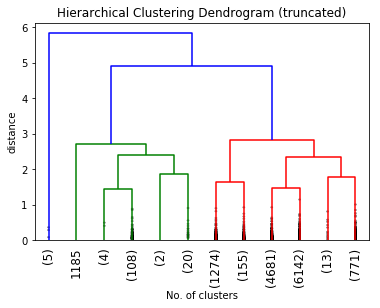

Last 12 cluster distances: [1.35792532 1.44500966 1.46479168 1.64162742 1.7836286  1.86888455
 2.35537126 2.38573141 2.71614065 2.8102559  4.90765819 5.84153728]


In [182]:
agg_cluster(test2_features,'average')

Cophenet Correlation: 0.7992607544617207


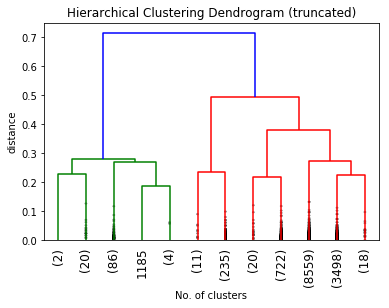

Last 12 cluster distances: [0.18334772 0.18537463 0.21762594 0.22470308 0.22809389 0.2338885
 0.2676544  0.27379143 0.28103361 0.38061355 0.49337998 0.71445316]


In [196]:
agg_cluster(cluster_test_2,'average')

In [197]:
t3_avg,a3_avg = agg_clust(cluster_test_2,n=3,affinity='euclidean',linkage='average')
df_t3_avg = g_tag_test.copy()
df_t3_avg['Cluster'] = a3_avg
df_t3_avg.head(100)

movieId                                              title  \
0         1                                   Toy Story (1995)   
1         2                                     Jumanji (1995)   
2         3                            Grumpier Old Men (1995)   
3         4                           Waiting to Exhale (1995)   
4         5                 Father of the Bride Part II (1995)   
5         6                                        Heat (1995)   
6         7                                     Sabrina (1995)   
7         8                                Tom and Huck (1995)   
8         9                                Sudden Death (1995)   
9        10                                   GoldenEye (1995)   
10       11                     American President, The (1995)   
11       12                 Dracula: Dead and Loving It (1995)   
12       13                                       Balto (1995)   
13       14                                       Nixon (1995)   
14       15                            Cutthroat Island (1995)   
15       16                                      Casino (1995)   
16       17                       Sense and Sensibility (1995)   
17       18                                  Four Rooms (1995)   
18       19              Ace Ventura: When Nature Calls (1995)   
19       20                                 Money Train (1995)   
20       21                                  Get Shorty (1995)   
21       22                                     Copycat (1995)   
22       23                                   Assassins (1995)   
23       24                                      Powder (1995)   
24       25                           Leaving Las Vegas (1995)   
25       26                                     Othello (1995)   
26       27                                Now and Then (1995)   
27       28                                  Persuasion (1995)   
28       29  City of Lost Children, The (Cité des enfants p...   
29       30  Shanghai Triad (Yao a yao yao dao waipo qiao) ...   
30       31                             Dangerous Minds (1995)   
31       32          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
32       33                            Wings of Courage (1995)   
33       34                                        Babe (1995)   
34       35                                  Carrington (1995)   
35       36                            Dead Man Walking (1995)   
36       37                      Across the Sea of Time (1995)   
37       38                                It Takes Two (1995)   
38       39                                    Clueless (1995)   
39       40                    Cry, the Beloved Country (1995)   
40       41                                 Richard III (1995)   
41       42                             Dead Presidents (1995)   
42       43                                 Restoration (1995)   
43       44                               Mortal Kombat (1995)   
44       45                                  To Die For (1995)   
45       46               How to Make an American Quilt (1995)   
46       47                        Seven (a.k.a. Se7en) (1995)   
47       48                                  Pocahontas (1995)   
48       49                       When Night Is Falling (1995)   
49       50                         Usual Suspects, The (1995)   
50       52                            Mighty Aphrodite (1995)   
51       53                                    Lamerica (1994)   
52       54                              Big Green, The (1995)   
53       55                                     Georgia (1995)   
54       56                     Kids of the Round Table (1995)   
55       57                       Home for the Holidays (1995)   
56       58                  Postman, The (Postino, Il) (1994)   
57       59       Confessional, The (Confessionnal, Le) (1995)   
58       60                 Indian in the Cupboard, The (1995)   
59       61                              Eye

In [190]:
t2_avg,a2_avg = agg_clust(test2_features,n=3,affinity='euclidean',linkage='average')
df_t2_avg = g_tag_test.copy()
df_t2_avg['Cluster'] = a2_avg
df_t2_avg.head(100)

movieId                                              title  \
0         1                                   Toy Story (1995)   
1         2                                     Jumanji (1995)   
2         3                            Grumpier Old Men (1995)   
3         4                           Waiting to Exhale (1995)   
4         5                 Father of the Bride Part II (1995)   
5         6                                        Heat (1995)   
6         7                                     Sabrina (1995)   
7         8                                Tom and Huck (1995)   
8         9                                Sudden Death (1995)   
9        10                                   GoldenEye (1995)   
10       11                     American President, The (1995)   
11       12                 Dracula: Dead and Loving It (1995)   
12       13                                       Balto (1995)   
13       14                                       Nixon (1995)   
14       15                            Cutthroat Island (1995)   
15       16                                      Casino (1995)   
16       17                       Sense and Sensibility (1995)   
17       18                                  Four Rooms (1995)   
18       19              Ace Ventura: When Nature Calls (1995)   
19       20                                 Money Train (1995)   
20       21                                  Get Shorty (1995)   
21       22                                     Copycat (1995)   
22       23                                   Assassins (1995)   
23       24                                      Powder (1995)   
24       25                           Leaving Las Vegas (1995)   
25       26                                     Othello (1995)   
26       27                                Now and Then (1995)   
27       28                                  Persuasion (1995)   
28       29  City of Lost Children, The (Cité des enfants p...   
29       30  Shanghai Triad (Yao a yao yao dao waipo qiao) ...   
30       31                             Dangerous Minds (1995)   
31       32          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
32       33                            Wings of Courage (1995)   
33       34                                        Babe (1995)   
34       35                                  Carrington (1995)   
35       36                            Dead Man Walking (1995)   
36       37                      Across the Sea of Time (1995)   
37       38                                It Takes Two (1995)   
38       39                                    Clueless (1995)   
39       40                    Cry, the Beloved Country (1995)   
40       41                                 Richard III (1995)   
41       42                             Dead Presidents (1995)   
42       43                                 Restoration (1995)   
43       44                               Mortal Kombat (1995)   
44       45                                  To Die For (1995)   
45       46               How to Make an American Quilt (1995)   
46       47                        Seven (a.k.a. Se7en) (1995)   
47       48                                  Pocahontas (1995)   
48       49                       When Night Is Falling (1995)   
49       50                         Usual Suspects, The (1995)   
50       52                            Mighty Aphrodite (1995)   
51       53                                    Lamerica (1994)   
52       54                              Big Green, The (1995)   
53       55                                     Georgia (1995)   
54       56                     Kids of the Round Table (1995)   
55       57                       Home for the Holidays (1995)   
56       58                  Postman, The (Postino, Il) (1994)   
57       59       Confessional, The (Confessionnal, Le) (1995)   
58       60                 Indian in the Cupboard, The (1995)   
59       61                              Eye

In [201]:
df_t2_avg.loc[df_t2_avg.Cluster == 2]

movieId                                              title  \
54          56                     Kids of the Round Table (1995)   
171        181     Mighty Morphin Power Rangers: The Movie (1995)   
738        810                                      Kazaam (1996)   
1185      1311                          Santa with Muscles (1996)   
1194      1322            Amityville 1992: It's About Time (1992)   
1195      1323                              Amityville 3-D (1983)   
1196      1324                       Amityville: Dollhouse (1996)   
1197      1325                Amityville: A New Generation (1993)   
1200      1328                       Amityville Curse, The (1990)   
1207      1335                                 Blood Beach (1981)   
1252      1383                    Adrenalin: Fear the Rush (1996)   
1344      1490                                     B*A*P*S (1997)   
1346      1495                Turbo: A Power Rangers Movie (1997)   
1423      1595                    Free Willy 3: The Rescue (1997)   
1427      1599                                       Steel (1997)   
1501      1679                       Chairman of the Board (1998)   
1546      1739        3 Ninjas: High Noon On Mega Mountain (1998)   
1561      1760                                 Spice World (1997)   
1602      1826                    Barney's Great Adventure (1998)   
1621      1853  Alan Smithee Film: Burn Hollywood Burn, An (1997)   
1653      1886                           I Got the Hook Up (1998)   
1746      1981  Friday the 13th Part VIII: Jason Takes Manhatt...   
1749      1984          Halloween III: Season of the Witch (1982)   
1754      1989               Prom Night III: The Last Kiss (1989)   
1755      1990         Prom Night IV: Deliver Us From Evil (1992)   
2008      2258                                 Master, The (1984)   
2110      2368                             King Kong Lives (1986)   
2125      2383          Police Academy 6: City Under Siege (1989)   
2128      2386                  Jerry Springer: Ringmaster (1998)   
2190      2449                Garbage Pail Kids Movie, The (1987)   
2193      2452                   Gate II: Trespassers, The (1990)   
2203      2462  Texas Chainsaw Massacre: The Next Generation (...   
2253      2516                    Children of the Corn III (1994)   
2290      2555                               Baby Geniuses (1999)   
2376      2655       Howling II: Your Sister Is a Werewolf (1985)   
2515      2799                             Problem Child 2 (1991)   
2532      2817                        Aces: Iron Eagle III (1992)   
2533      2818                               Iron Eagle IV (1995)   
2598      2887                                   Simon Sez (1999)   
2678      2974                                        Bats (1999)   
2727      3026                              Slaughterhouse (1987)   
2741      3041                           Meatballs Part II (1984)   
2742      3042                               Meatballs III (1987)   
2743      3043                                 Meatballs 4 (1992)   
2855      3166                                Brenda Starr (1989)   
3032      3390                           Shanghai Surprise (1986)   
3072      3433                 Death Wish 4: The Crackdown (1987)   
3073      3434             Death Wish 5: The Face of Death (1994)   
3076      3437                                 Cool as Ice (1991)   
3198      3572                                   Carnosaur (1993)   
3199      3573                                 Carnosaur 2 (1995)   
3200      3574                 Carnosaur 3: Primal Species (1996)   
3216      3593                           Battlefield Earth (2000)   
3276      3663                             Puppet Master 4 (1993)   
3277      3664          Puppet Master 5: The Final Chapter (1994)   
3278      3665  Curse of the Puppet Master (Puppet Master 6: T...   
3279      3666       Retro Puppet Master (Puppet Master 7) (1999)   
3406 

In [199]:
df_t2_avg.loc[df_t2_avg.imdbId == 'tt0368226']

movieId             title                genres     imdbId tmdbId  \
10113    74754  Room, The (2003)  Comedy|Drama|Romance  tt0368226  17473   

       (count, 0.5)  (count, 1.0)  (count, 1.5)  (count, 2.0)  (count, 2.5)  \
10113         151.0          81.0          29.0          41.0          22.0   

       (count, 3.0)  (count, 3.5)  (count, 4.0)  (count, 4.5)  (count, 5.0)  \
10113          53.0          45.0          55.0          24.0          93.0   

        Cheesy    Cult  Cult Classic  Cult Film  Low Budget  Scifi Cult  \
10113  0.13125  0.2365         0.622     0.8735      0.4445      0.0655   

       So bad its funny  So bad its good  Unintentionally funny  total_count  \
10113            0.8505           0.8165                  0.781        594.0   

       percent_0.5to1  percent_4.5to5  percent_polarity  total_tails  Cluster  
10113        0.390572         0.19697          0.193603     0.587542        2

In [206]:
test_2_labels = t2_avg.labels_
cluster_scores(cluster_test_2,test_2_labels)

Calinski-Harabaz:  937.7547821984986
Silhouette:  0.610747592519407


In [212]:
df_t2_avg.drop(df_t2_avg.index[5117:5124],inplace=True)
df_t2_avg

movieId                                              title  \
0            1                                   Toy Story (1995)   
1            2                                     Jumanji (1995)   
2            3                            Grumpier Old Men (1995)   
3            4                           Waiting to Exhale (1995)   
4            5                 Father of the Bride Part II (1995)   
5            6                                        Heat (1995)   
6            7                                     Sabrina (1995)   
7            8                                Tom and Huck (1995)   
8            9                                Sudden Death (1995)   
9           10                                   GoldenEye (1995)   
10          11                     American President, The (1995)   
11          12                 Dracula: Dead and Loving It (1995)   
12          13                                       Balto (1995)   
13          14                                       Nixon (1995)   
14          15                            Cutthroat Island (1995)   
15          16                                      Casino (1995)   
16          17                       Sense and Sensibility (1995)   
17          18                                  Four Rooms (1995)   
18          19              Ace Ventura: When Nature Calls (1995)   
19          20                                 Money Train (1995)   
20          21                                  Get Shorty (1995)   
21          22                                     Copycat (1995)   
22          23                                   Assassins (1995)   
23          24                                      Powder (1995)   
24          25                           Leaving Las Vegas (1995)   
25          26                                     Othello (1995)   
26          27                                Now and Then (1995)   
27          28                                  Persuasion (1995)   
28          29  City of Lost Children, The (Cité des enfants p...   
29          30  Shanghai Triad (Yao a yao yao dao waipo qiao) ...   
30          31                             Dangerous Minds (1995)   
31          32          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
32          33                            Wings of Courage (1995)   
33          34                                        Babe (1995)   
34          35                                  Carrington (1995)   
35          36                            Dead Man Walking (1995)   
36          37                      Across the Sea of Time (1995)   
37          38                                It Takes Two (1995)   
38          39                                    Clueless (1995)   
39          40                    Cry, the Beloved Country (1995)   
40          41                                 Richard III (1995)   
41          42                             Dead Presidents (1995)   
42          43                                 Restoration (1995)   
43          44                               Mortal Kombat (1995)   
44          45                                  To Die For (1995)   
45          46               How to Make an American Quilt (1995)   
46          47                        Seven (a.k.a. Se7en) (1995)   
47          48                                  Pocahontas (1995)   
48          49                       When Night Is Falling (1995)   
49          50                         Usual Suspects, The (1995)   
50          52                            Mighty Aphrodite (1995)   
51          53                                    Lamerica (1994)   
52          54                              Big Green, The (1995)   
53          55                                     Georgia (1995)   
54          56                     Kids of the Round Table (1995)   
55          57                       Home for the Holidays (1995)   
56          58                  Postman, The (Postino, Il) (1994)   
57   

In [213]:
good_bad_df = df_t2_avg.loc[df_t2_avg.Cluster == 2]
good_bad_df.reset_index(inplace=True)
good_bad_df.head()

index  movieId                                           title  \
0     54       56                  Kids of the Round Table (1995)   
1    171      181  Mighty Morphin Power Rangers: The Movie (1995)   
2    738      810                                   Kazaam (1996)   
3   1185     1311                       Santa with Muscles (1996)   
4   1194     1322         Amityville 1992: It's About Time (1992)   

                              genres     imdbId  tmdbId  (count, 0.5)  \
0  Adventure|Children|Comedy|Fantasy  tt0113541  124057           4.0   
1                    Action|Children  tt0113820    9070         310.0   
2            Children|Comedy|Fantasy  tt0116756   11511         292.0   
3                             Comedy  tt0117550   31388           9.0   
4                             Horror  tt0103678   41671          28.0   

   (count, 1.0)  (count, 1.5)  (count, 2.0)  (count, 2.5)  (count, 3.0)  \
0          33.0           2.0          15.0           2.0          11.0   
1         970.0          99.0         534.0         130.0         602.0   
2         732.0          97.0         344.0          92.0         379.0   
3          63.0           3.0          17.0           2.0          16.0   
4         138.0           7.0          52.0          10.0          46.0   

   (count, 3.5)  (count, 4.0)  (count, 4.5)  (count, 5.0)   Cheesy     Cult  \
0           2.0          12.0           0.0           2.0  0.07925  0.05750   
1          81.0         159.0          24.0          92.0  0.51800  0.04625   
2          45.0         103.0           3.0          71.0  0.69925  0.05125   
3           1.0           6.0           0.0          47.0  0.24975  0.03275   
4           6.0          12.0           1.0           9.0  0.22775  0.08275   

   Cult Classic  Cult Film  Low Budget  Scifi Cult  So bad its funny  \
0       0.11125    0.31900     0.05300     0.03125           0.41850   
1       0.16725    0.24025     0.06100     0.03125           0.60575   
2       0.22775    0.42125     0.05250     0.05100           0.83000   
3       0.09725    0.24875     0.03275     0.04525           0.47425   
4       0.15500    0.36000     0.17350     0.03300           0.40975   

   So bad its good  Unintentionally funny  total_count  percent_0.5to1  \
0          0.02000                0.01850         83.0        0.445783   
1          0.08200                0.06550       3001.0        0.426524   
2          0.28650                0.14700       2158.0        0.474513   
3          0.36900                0.05675        164.0        0.439024   
4          0.04625                0.03275        309.0        0.537217   

   percent_4.5to5  percent_polarity  total_tails  Cluster  
0        0.024096          0.421687     0.469880        2  
1        0.038654          0.387871     0.465178        2  
2        0.034291          0.440222     0.508804        2  
3        0.286585          0.152439     0.725610        2  
4        0.032362          0.504854     0.569579        2

In [215]:
print(df_t2_avg['So bad its funny'].mean())
print(good_bad_df['So bad its funny'].mean())

0.2917602703318404
0.6627207031249999


In [216]:
print(df_test2_avg['So bad its good'].mean())
print(good_bad_df['So bad its good'].mean())

0.03552878339404962
0.16074999999999998


In [214]:
good_bad_df.head(100)

index  movieId                                              title  \
0      54       56                     Kids of the Round Table (1995)   
1     171      181     Mighty Morphin Power Rangers: The Movie (1995)   
2     738      810                                      Kazaam (1996)   
3    1185     1311                          Santa with Muscles (1996)   
4    1194     1322            Amityville 1992: It's About Time (1992)   
5    1195     1323                              Amityville 3-D (1983)   
6    1196     1324                       Amityville: Dollhouse (1996)   
7    1197     1325                Amityville: A New Generation (1993)   
8    1200     1328                       Amityville Curse, The (1990)   
9    1207     1335                                 Blood Beach (1981)   
10   1252     1383                    Adrenalin: Fear the Rush (1996)   
11   1344     1490                                     B*A*P*S (1997)   
12   1346     1495                Turbo: A Power Rangers Movie (1997)   
13   1423     1595                    Free Willy 3: The Rescue (1997)   
14   1427     1599                                       Steel (1997)   
15   1501     1679                       Chairman of the Board (1998)   
16   1546     1739        3 Ninjas: High Noon On Mega Mountain (1998)   
17   1561     1760                                 Spice World (1997)   
18   1602     1826                    Barney's Great Adventure (1998)   
19   1621     1853  Alan Smithee Film: Burn Hollywood Burn, An (1997)   
20   1653     1886                           I Got the Hook Up (1998)   
21   1746     1981  Friday the 13th Part VIII: Jason Takes Manhatt...   
22   1749     1984          Halloween III: Season of the Witch (1982)   
23   1754     1989               Prom Night III: The Last Kiss (1989)   
24   1755     1990         Prom Night IV: Deliver Us From Evil (1992)   
25   2008     2258                                 Master, The (1984)   
26   2110     2368                             King Kong Lives (1986)   
27   2125     2383          Police Academy 6: City Under Siege (1989)   
28   2128     2386                  Jerry Springer: Ringmaster (1998)   
29   2190     2449                Garbage Pail Kids Movie, The (1987)   
30   2193     2452                   Gate II: Trespassers, The (1990)   
31   2203     2462  Texas Chainsaw Massacre: The Next Generation (...   
32   2253     2516                    Children of the Corn III (1994)   
33   2290     2555                               Baby Geniuses (1999)   
34   2376     2655       Howling II: Your Sister Is a Werewolf (1985)   
35   2515     2799                             Problem Child 2 (1991)   
36   2532     2817                        Aces: Iron Eagle III (1992)   
37   2533     2818                               Iron Eagle IV (1995)   
38   2598     2887                                   Simon Sez (1999)   
39   2678     2974                                        Bats (1999)   
40   2727     3026                              Slaughterhouse (1987)   
41   2741     3041                           Meatballs Part II (1984)   
42   2742     3042                               Meatballs III (1987)   
43   2743     3043                                 Meatballs 4 (1992)   
44   2855     3166                                Brenda Starr (1989)   
45   3032     3390                           Shanghai Surprise (1986)   
46   3072     3433                 Death Wish 4: The Crackdown (1987)   
47   3073     3434             Death Wish 5: The Face of Death (1994)   
48   3076     3437                                 Cool as Ice (1991)   
49   3198     3572                                   Carnosaur (1993)   
50   3199     3573                                 Carnosaur 2 (1995)   
51   3200     3574                 Carnosaur 3: Primal Species (1996)   
52   3216     3593                           Battlefield Earth (2000)   
53   3276     3663                             Puppet Master 4

In [217]:
len(good_bad_df)

128

In [218]:
good_bad_df.to_csv('good_bad_movie_list.csv')

### Creating item-item recommender df.

In [219]:
collab_test = pd.read_csv('ml-latest/ratings.csv')

In [220]:
collab_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 4 columns):
userId       int64
movieId      int64
rating       float64
timestamp    int64
dtypes: float64(1), int64(3)
memory usage: 847.0 MB


In [221]:
len(collab_test.loc[collab_test['movieId']==1760])

3193

In [222]:
movie_list = list(good_bad_df['movieId'])
mask = collab_test['movieId'].isin(movie_list) == True
gb_ratings = collab_test[mask]
len(gb_ratings)

63163

In [223]:
gb_ratings.head()

userId  movieId  rating   timestamp
90         4      181     0.5  1127946789
296        4     1760     0.5  1114050751
484        4     3593     1.0  1115782046
1631      19      181     2.0   836433987
2655      38     4125     1.0   982853654

In [224]:
len(gb_ratings.loc[gb_ratings['movieId']==1760])

3193

In [225]:
gb_ratings.to_csv('item_item_test.csv')

### Testing on larger data.

In [226]:
df_master['tmdbId'].fillna(value='N/A',inplace=True)
df_master.fillna(value=0,inplace=True)

In [227]:
df_master['total_count'] = df_master.iloc[:,5:15].sum(axis=1)
df_master['percent_0.5to1'] = (df_master.iloc[:,[5,6]].sum(axis=1)) / df_master['total_count']
df_master['percent_4.5to5'] = (df_master.iloc[:,[13,14]].sum(axis=1)) / df_master['total_count']
df_master['percent_polarity'] = df_master['percent_0.5to1'] - df_master['percent_4.5to5']
df_master['total_tails'] = df_master['percent_0.5to1'] + df_master['percent_4.5to5']
df_master.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres     imdbId tmdbId  \
0  Adventure|Animation|Children|Comedy|Fantasy  tt0114709    862   
1                   Adventure|Children|Fantasy  tt0113497   8844   
2                               Comedy|Romance  tt0113228  15602   
3                         Comedy|Drama|Romance  tt0114885  31357   
4                                       Comedy  tt0113041  11862   

   (count, 0.5)  (count, 1.0)  (count, 1.5)  (count, 2.0)  (count, 2.5)  \
0         478.0         840.0         468.0        2160.0        1665.0   
1         276.0         813.0         542.0        2551.0        1902.0   
2         174.0         777.0         237.0        1677.0         629.0   
3          48.0         352.0          31.0         497.0          77.0   
4         248.0         802.0         282.0        1737.0         681.0   

   (count, 3.0)  (count, 3.5)  (count, 4.0)  (count, 4.5)  (count, 5.0)  \
0       11872.0        6095.0       22710.0        5684.0       16497.0   
1        8711.0        3116.0        6303.0         790.0        2139.0   
2        6227.0         774.0        3440.0         159.0        1491.0   
3        1136.0          68.0         557.0          12.0         211.0   
4        6655.0         761.0        2989.0         174.0        1145.0   

   total_count  percent_0.5to1  percent_4.5to5  percent_polarity  total_tails  
0      68469.0        0.019250        0.323957         -0.304707     0.343206  
1      27143.0        0.040121        0.107910         -0.067789     0.148031  
2      15585.0        0.061020        0.105871         -0.044851     0.166891  
3       2989.0        0.133824        0.074607          0.059217     0.208431  
4      15474.0        0.067856        0.085240         -0.017384     0.153096

In [228]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53889 entries, 0 to 53888
Data columns (total 20 columns):
movieId             53889 non-null int64
title               53889 non-null object
genres              53889 non-null object
imdbId              53889 non-null object
tmdbId              53889 non-null object
(count, 0.5)        53889 non-null float64
(count, 1.0)        53889 non-null float64
(count, 1.5)        53889 non-null float64
(count, 2.0)        53889 non-null float64
(count, 2.5)        53889 non-null float64
(count, 3.0)        53889 non-null float64
(count, 3.5)        53889 non-null float64
(count, 4.0)        53889 non-null float64
(count, 4.5)        53889 non-null float64
(count, 5.0)        53889 non-null float64
total_count         53889 non-null float64
percent_0.5to1      53889 non-null float64
percent_4.5to5      53889 non-null float64
percent_polarity    53889 non-null float64
total_tails         53889 non-null float64
dtypes: float64(15), int64(1), object

In [229]:
df_master.isnull().sum()

movieId             0
title               0
genres              0
imdbId              0
tmdbId              0
(count, 0.5)        0
(count, 1.0)        0
(count, 1.5)        0
(count, 2.0)        0
(count, 2.5)        0
(count, 3.0)        0
(count, 3.5)        0
(count, 4.0)        0
(count, 4.5)        0
(count, 5.0)        0
total_count         0
percent_0.5to1      0
percent_4.5to5      0
percent_polarity    0
total_tails         0
dtype: int64

In [230]:
df_trim = df_master.loc[df_master.total_count > 30]
df_trim.total_count.value_counts()

31.0       172
33.0       171
32.0       169
35.0       161
34.0       155
39.0       138
36.0       135
37.0       124
38.0       123
46.0       122
40.0       117
44.0       114
43.0       108
41.0       106
42.0       106
45.0       100
56.0        99
52.0        99
47.0        96
55.0        95
49.0        94
53.0        90
50.0        90
51.0        89
54.0        82
61.0        81
48.0        80
58.0        79
70.0        78
69.0        75
76.0        75
57.0        73
63.0        72
59.0        72
62.0        69
74.0        67
64.0        60
60.0        59
68.0        56
80.0        56
73.0        56
67.0        55
86.0        54
87.0        52
82.0        52
100.0       52
65.0        51
75.0        51
79.0        49
77.0        48
78.0        48
85.0        47
72.0        47
71.0        46
102.0       46
84.0        45
88.0        45
81.0        44
110.0       44
94.0        44
66.0        44
119.0       42
83.0        41
90.0        40
105.0       39
91.0        38
104.0     

In [231]:
df_trim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15751 entries, 0 to 53288
Data columns (total 20 columns):
movieId             15751 non-null int64
title               15751 non-null object
genres              15751 non-null object
imdbId              15751 non-null object
tmdbId              15751 non-null object
(count, 0.5)        15751 non-null float64
(count, 1.0)        15751 non-null float64
(count, 1.5)        15751 non-null float64
(count, 2.0)        15751 non-null float64
(count, 2.5)        15751 non-null float64
(count, 3.0)        15751 non-null float64
(count, 3.5)        15751 non-null float64
(count, 4.0)        15751 non-null float64
(count, 4.5)        15751 non-null float64
(count, 5.0)        15751 non-null float64
total_count         15751 non-null float64
percent_0.5to1      15751 non-null float64
percent_4.5to5      15751 non-null float64
percent_polarity    15751 non-null float64
total_tails         15751 non-null float64
dtypes: float64(15), int64(1), object

In [232]:
cols = ['percent_polarity','total_tails']
lg_test = df_trim[cols]
lg_test.head()

percent_polarity  total_tails
0         -0.304707     0.343206
1         -0.067789     0.148031
2         -0.044851     0.166891
3          0.059217     0.208431
4         -0.017384     0.153096

In [233]:
scaler = StandardScaler()
bigtest_scaled = scaler.fit_transform(lg_test)
bigtest_features = pd.DataFrame(bigtest_scaled, columns=lg_test.columns)

Cophenet Correlation: 0.7992767966517786


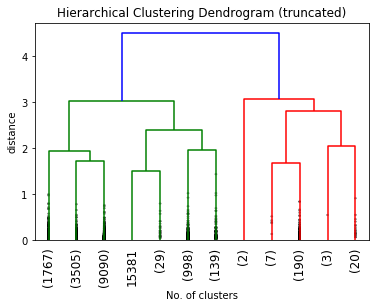

Last 12 cluster distances: [1.46919476 1.50912074 1.67799204 1.72707943 1.94509675 1.96509815
 2.03951408 2.40074528 2.79655879 3.02671788 3.06104486 4.50133328]


In [234]:
agg_cluster(bigtest_features,'average')

In [236]:
bigtest_agg,as_bigtest = tqdm(agg_clust(bigtest_features,n=2,affinity='euclidean',linkage='average'))
bigtest_avg = df_trim.copy()
bigtest_avg['Cluster'] = as_bigtest
bigtest_avg.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15751 entries, 0 to 53288
Data columns (total 21 columns):
movieId             15751 non-null int64
title               15751 non-null object
genres              15751 non-null object
imdbId              15751 non-null object
tmdbId              15751 non-null object
(count, 0.5)        15751 non-null float64
(count, 1.0)        15751 non-null float64
(count, 1.5)        15751 non-null float64
(count, 2.0)        15751 non-null float64
(count, 2.5)        15751 non-null float64
(count, 3.0)        15751 non-null float64
(count, 3.5)        15751 non-null float64
(count, 4.0)        15751 non-null float64
(count, 4.5)        15751 non-null float64
(count, 5.0)        15751 non-null float64
total_count         15751 non-null float64
percent_0.5to1      15751 non-null float64
percent_4.5to5      15751 non-null float64
percent_polarity    15751 non-null float64
total_tails         15751 non-null float64
Cluster             15751 non-null i

In [237]:
bigtest_labels = bigtest_agg.labels_

In [238]:
metrics.silhouette_score(lg_test,bigtest_labels) 

0.6448409771711769

## ^^^FINAL SILHOUETTE SCORE ^^^

In [240]:
bigtest_avg.loc[bigtest_avg.Cluster == 0]

movieId                                              title  \
55          56                     Kids of the Round Table (1995)   
179        181     Mighty Morphin Power Rangers: The Movie (1995)   
283        286                           Nemesis 2: Nebula (1995)   
585        591                            Tough and Deadly (1995)   
797        810                                      Kazaam (1996)   
1282      1311                          Santa with Muscles (1996)   
1293      1322            Amityville 1992: It's About Time (1992)   
1294      1323                              Amityville 3-D (1983)   
1295      1324                       Amityville: Dollhouse (1996)   
1296      1325                Amityville: A New Generation (1993)   
1297      1326               Amityville II: The Possession (1982)   
1299      1328                       Amityville Curse, The (1990)   
1306      1335                                 Blood Beach (1981)   
1352      1383                    Adrenalin: Fear the Rush (1996)   
1358      1389                                    Jaws 3-D (1983)   
1399      1433                                 The Machine (1994)   
1450      1490                                     B*A*P*S (1997)   
1452      1495                Turbo: A Power Rangers Movie (1997)   
1543      1595                    Free Willy 3: The Rescue (1997)   
1547      1599                                       Steel (1997)   
1622      1679                       Chairman of the Board (1998)   
1648      1707                                Home Alone 3 (1997)   
1671      1731                                   Mr. Magoo (1997)   
1677      1739        3 Ninjas: High Noon On Mega Mountain (1998)   
1694      1760                                 Spice World (1997)   
1697      1765                    Letter From Death Row, A (1998)   
1743      1822                            Meet the Deedles (1998)   
1746      1826                    Barney's Great Adventure (1998)   
1771      1853  Alan Smithee Film: Burn Hollywood Burn, An (1997)   
1897      1980     Friday the 13th Part VII: The New Blood (1988)   
1898      1981  Friday the 13th Part VIII: Jason Takes Manhatt...   
1901      1984          Halloween III: Season of the Witch (1982)   
1906      1989               Prom Night III: The Last Kiss (1989)   
1907      1990         Prom Night IV: Deliver Us From Evil (1992)   
1915      1998                    Exorcist II: The Heretic (1977)   
2069      2152                    Air Bud: Golden Receiver (1998)   
2174      2258                                 Master, The (1984)   
2284      2368                             King Kong Lives (1986)   
2298      2382   Police Academy 5: Assignment: Miami Beach (1988)   
2299      2383          Police Academy 6: City Under Siege (1989)   
2302      2386                  Jerry Springer: Ringmaster (1998)   
2365      2449                Garbage Pail Kids Movie, The (1987)   
2368      2452                   Gate II: Trespassers, The (1990)   
2377      2461    Leatherface: Texas Chainsaw Massacre III (1990)   
2378      2462  Texas Chainsaw Massacre: The Next Generation (...   
2431      2515  Children of the Corn II: The Final Sacrifice (...   
2432      2516                    Children of the Corn III (1994)   
2471      2555                               Baby Geniuses (1999)   
2547      2631                            Frogs for Snakes (1998)   
2570      2655       Howling II: Your Sister Is a Werewolf (1985)   
2714      2799                             Problem Child 2 (1991)   
2722      2807               Universal Soldier: The Return (1999)   
2731      2816                               Iron Eagle II (1988)   
2732      2817                        Aces: Iron Eagle III (1992)   
2733      2818                               Iron Eagle IV (1995)   
2802      2887                                   Simon Sez (1999)   
2870      2955                             Penitentiary II (1982)   
2880 

In [241]:
len(bigtest_avg.loc[bigtest_avg.Cluster == 0])

222

In [242]:
good_bad_df_2 = bigtest_avg.loc[bigtest_avg.Cluster == 0]
good_bad_df_2.reset_index(inplace=True)
good_bad_df_2.head()

index  movieId                                           title  \
0     55       56                  Kids of the Round Table (1995)   
1    179      181  Mighty Morphin Power Rangers: The Movie (1995)   
2    283      286                        Nemesis 2: Nebula (1995)   
3    585      591                         Tough and Deadly (1995)   
4    797      810                                   Kazaam (1996)   

                              genres     imdbId  tmdbId  (count, 0.5)  \
0  Adventure|Children|Comedy|Fantasy  tt0113541  124057           4.0   
1                    Action|Children  tt0113820    9070         310.0   
2             Action|Sci-Fi|Thriller  tt0113948   63105           8.0   
3              Action|Drama|Thriller  tt0114706   80350           0.0   
4            Children|Comedy|Fantasy  tt0116756   11511         292.0   

   (count, 1.0)  (count, 1.5)  (count, 2.0)  (count, 2.5)  (count, 3.0)  \
0          33.0           2.0          15.0           2.0          11.0   
1         970.0          99.0         534.0         130.0         602.0   
2          38.0           3.0          30.0           2.0          18.0   
3          14.0           1.0           9.0           0.0           8.0   
4         732.0          97.0         344.0          92.0         379.0   

   (count, 3.5)  (count, 4.0)  (count, 4.5)  (count, 5.0)  total_count  \
0           2.0          12.0           0.0           2.0         83.0   
1          81.0         159.0          24.0          92.0       3001.0   
2           2.0           8.0           0.0           5.0        114.0   
3           0.0           3.0           0.0           1.0         36.0   
4          45.0         103.0           3.0          71.0       2158.0   

   percent_0.5to1  percent_4.5to5  percent_polarity  total_tails  Cluster  
0        0.445783        0.024096          0.421687     0.469880        0  
1        0.426524        0.038654          0.387871     0.465178        0  
2        0.403509        0.043860          0.359649     0.447368        0  
3        0.388889        0.027778          0.361111     0.416667        0  
4        0.474513        0.034291          0.440222     0.508804        0

In [244]:
good_bad_df_2.drop(good_bad_df_2.index[124:131],inplace=True)
good_bad_df_2.head(120)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


index  movieId                                              title  \
0       55       56                     Kids of the Round Table (1995)   
1      179      181     Mighty Morphin Power Rangers: The Movie (1995)   
2      283      286                           Nemesis 2: Nebula (1995)   
3      585      591                            Tough and Deadly (1995)   
4      797      810                                      Kazaam (1996)   
5     1282     1311                          Santa with Muscles (1996)   
6     1293     1322            Amityville 1992: It's About Time (1992)   
7     1294     1323                              Amityville 3-D (1983)   
8     1295     1324                       Amityville: Dollhouse (1996)   
9     1296     1325                Amityville: A New Generation (1993)   
10    1297     1326               Amityville II: The Possession (1982)   
11    1299     1328                       Amityville Curse, The (1990)   
12    1306     1335                                 Blood Beach (1981)   
13    1352     1383                    Adrenalin: Fear the Rush (1996)   
14    1358     1389                                    Jaws 3-D (1983)   
15    1399     1433                                 The Machine (1994)   
16    1450     1490                                     B*A*P*S (1997)   
17    1452     1495                Turbo: A Power Rangers Movie (1997)   
18    1543     1595                    Free Willy 3: The Rescue (1997)   
19    1547     1599                                       Steel (1997)   
20    1622     1679                       Chairman of the Board (1998)   
21    1648     1707                                Home Alone 3 (1997)   
22    1671     1731                                   Mr. Magoo (1997)   
23    1677     1739        3 Ninjas: High Noon On Mega Mountain (1998)   
24    1694     1760                                 Spice World (1997)   
25    1697     1765                    Letter From Death Row, A (1998)   
26    1743     1822                            Meet the Deedles (1998)   
27    1746     1826                    Barney's Great Adventure (1998)   
28    1771     1853  Alan Smithee Film: Burn Hollywood Burn, An (1997)   
29    1897     1980     Friday the 13th Part VII: The New Blood (1988)   
30    1898     1981  Friday the 13th Part VIII: Jason Takes Manhatt...   
31    1901     1984          Halloween III: Season of the Witch (1982)   
32    1906     1989               Prom Night III: The Last Kiss (1989)   
33    1907     1990         Prom Night IV: Deliver Us From Evil (1992)   
34    1915     1998                    Exorcist II: The Heretic (1977)   
35    2069     2152                    Air Bud: Golden Receiver (1998)   
36    2174     2258                                 Master, The (1984)   
37    2284     2368                             King Kong Lives (1986)   
38    2298     2382   Police Academy 5: Assignment: Miami Beach (1988)   
39    2299     2383          Police Academy 6: City Under Siege (1989)   
40    2302     2386                  Jerry Springer: Ringmaster (1998)   
41    2365     2449                Garbage Pail Kids Movie, The (1987)   
42    2368     2452                   Gate II: Trespassers, The (1990)   
43    2377     2461    Leatherface: Texas Chainsaw Massacre III (1990)   
44    2378     2462  Texas Chainsaw Massacre: The Next Generation (...   
45    2431     2515  Children of the Corn II: The Final Sacrifice (...   
46    2432     2516                    Children of the Corn III (1994)   
47    2471     2555                               Baby Geniuses (1999)   
48    2547     2631                            Frogs for Snakes (1998)   
49    2570     2655       Howling II: Your Sister Is a Werewolf (1985)   
50    2714     2799                             Problem Child 2 (1991)   
51    2722     2807               Universal Soldier: The Return (1999)   
52    2731     2816                               Iron Eagle II (1988)   
53    273

In [245]:
good_bad_df_2.head(200)

index  movieId                                              title  \
0       55       56                     Kids of the Round Table (1995)   
1      179      181     Mighty Morphin Power Rangers: The Movie (1995)   
2      283      286                           Nemesis 2: Nebula (1995)   
3      585      591                            Tough and Deadly (1995)   
4      797      810                                      Kazaam (1996)   
5     1282     1311                          Santa with Muscles (1996)   
6     1293     1322            Amityville 1992: It's About Time (1992)   
7     1294     1323                              Amityville 3-D (1983)   
8     1295     1324                       Amityville: Dollhouse (1996)   
9     1296     1325                Amityville: A New Generation (1993)   
10    1297     1326               Amityville II: The Possession (1982)   
11    1299     1328                       Amityville Curse, The (1990)   
12    1306     1335                                 Blood Beach (1981)   
13    1352     1383                    Adrenalin: Fear the Rush (1996)   
14    1358     1389                                    Jaws 3-D (1983)   
15    1399     1433                                 The Machine (1994)   
16    1450     1490                                     B*A*P*S (1997)   
17    1452     1495                Turbo: A Power Rangers Movie (1997)   
18    1543     1595                    Free Willy 3: The Rescue (1997)   
19    1547     1599                                       Steel (1997)   
20    1622     1679                       Chairman of the Board (1998)   
21    1648     1707                                Home Alone 3 (1997)   
22    1671     1731                                   Mr. Magoo (1997)   
23    1677     1739        3 Ninjas: High Noon On Mega Mountain (1998)   
24    1694     1760                                 Spice World (1997)   
25    1697     1765                    Letter From Death Row, A (1998)   
26    1743     1822                            Meet the Deedles (1998)   
27    1746     1826                    Barney's Great Adventure (1998)   
28    1771     1853  Alan Smithee Film: Burn Hollywood Burn, An (1997)   
29    1897     1980     Friday the 13th Part VII: The New Blood (1988)   
30    1898     1981  Friday the 13th Part VIII: Jason Takes Manhatt...   
31    1901     1984          Halloween III: Season of the Witch (1982)   
32    1906     1989               Prom Night III: The Last Kiss (1989)   
33    1907     1990         Prom Night IV: Deliver Us From Evil (1992)   
34    1915     1998                    Exorcist II: The Heretic (1977)   
35    2069     2152                    Air Bud: Golden Receiver (1998)   
36    2174     2258                                 Master, The (1984)   
37    2284     2368                             King Kong Lives (1986)   
38    2298     2382   Police Academy 5: Assignment: Miami Beach (1988)   
39    2299     2383          Police Academy 6: City Under Siege (1989)   
40    2302     2386                  Jerry Springer: Ringmaster (1998)   
41    2365     2449                Garbage Pail Kids Movie, The (1987)   
42    2368     2452                   Gate II: Trespassers, The (1990)   
43    2377     2461    Leatherface: Texas Chainsaw Massacre III (1990)   
44    2378     2462  Texas Chainsaw Massacre: The Next Generation (...   
45    2431     2515  Children of the Corn II: The Final Sacrifice (...   
46    2432     2516                    Children of the Corn III (1994)   
47    2471     2555                               Baby Geniuses (1999)   
48    2547     2631                            Frogs for Snakes (1998)   
49    2570     2655       Howling II: Your Sister Is a Werewolf (1985)   
50    2714     2799                             Problem Child 2 (1991)   
51    2722     2807               Universal Soldier: The Return (1999)   
52    2731     2816                               Iron Eagle II (1988)   
53    273

In [246]:
movie_list = list(good_bad_df_2['movieId'])
mask_2 = collab_test['movieId'].isin(movie_list) == True
gb_ratings_2 = collab_test[mask_2]


In [247]:
len(gb_ratings_2)

100863

In [248]:
gb_ratings_2.to_csv('item_item_final.csv')

In [249]:
good_bad_df_2

index  movieId                                              title  \
0       55       56                     Kids of the Round Table (1995)   
1      179      181     Mighty Morphin Power Rangers: The Movie (1995)   
2      283      286                           Nemesis 2: Nebula (1995)   
3      585      591                            Tough and Deadly (1995)   
4      797      810                                      Kazaam (1996)   
5     1282     1311                          Santa with Muscles (1996)   
6     1293     1322            Amityville 1992: It's About Time (1992)   
7     1294     1323                              Amityville 3-D (1983)   
8     1295     1324                       Amityville: Dollhouse (1996)   
9     1296     1325                Amityville: A New Generation (1993)   
10    1297     1326               Amityville II: The Possession (1982)   
11    1299     1328                       Amityville Curse, The (1990)   
12    1306     1335                                 Blood Beach (1981)   
13    1352     1383                    Adrenalin: Fear the Rush (1996)   
14    1358     1389                                    Jaws 3-D (1983)   
15    1399     1433                                 The Machine (1994)   
16    1450     1490                                     B*A*P*S (1997)   
17    1452     1495                Turbo: A Power Rangers Movie (1997)   
18    1543     1595                    Free Willy 3: The Rescue (1997)   
19    1547     1599                                       Steel (1997)   
20    1622     1679                       Chairman of the Board (1998)   
21    1648     1707                                Home Alone 3 (1997)   
22    1671     1731                                   Mr. Magoo (1997)   
23    1677     1739        3 Ninjas: High Noon On Mega Mountain (1998)   
24    1694     1760                                 Spice World (1997)   
25    1697     1765                    Letter From Death Row, A (1998)   
26    1743     1822                            Meet the Deedles (1998)   
27    1746     1826                    Barney's Great Adventure (1998)   
28    1771     1853  Alan Smithee Film: Burn Hollywood Burn, An (1997)   
29    1897     1980     Friday the 13th Part VII: The New Blood (1988)   
30    1898     1981  Friday the 13th Part VIII: Jason Takes Manhatt...   
31    1901     1984          Halloween III: Season of the Witch (1982)   
32    1906     1989               Prom Night III: The Last Kiss (1989)   
33    1907     1990         Prom Night IV: Deliver Us From Evil (1992)   
34    1915     1998                    Exorcist II: The Heretic (1977)   
35    2069     2152                    Air Bud: Golden Receiver (1998)   
36    2174     2258                                 Master, The (1984)   
37    2284     2368                             King Kong Lives (1986)   
38    2298     2382   Police Academy 5: Assignment: Miami Beach (1988)   
39    2299     2383          Police Academy 6: City Under Siege (1989)   
40    2302     2386                  Jerry Springer: Ringmaster (1998)   
41    2365     2449                Garbage Pail Kids Movie, The (1987)   
42    2368     2452                   Gate II: Trespassers, The (1990)   
43    2377     2461    Leatherface: Texas Chainsaw Massacre III (1990)   
44    2378     2462  Texas Chainsaw Massacre: The Next Generation (...   
45    2431     2515  Children of the Corn II: The Final Sacrifice (...   
46    2432     2516                    Children of the Corn III (1994)   
47    2471     2555                               Baby Geniuses (1999)   
48    2547     2631                            Frogs for Snakes (1998)   
49    2570     2655       Howling II: Your Sister Is a Werewolf (1985)   
50    2714     2799                             Problem Child 2 (1991)   
51    2722     2807               Universal Soldier: The Return (1999)   
52    2731     2816                               Iron Eagle II (1988)   
53    273

In [250]:
len(good_bad_df_2)

215

In [251]:
good_bad_df_2.to_csv('final_data.csv')

In [621]:
bigtest_avg.reset_index(inplace=True)

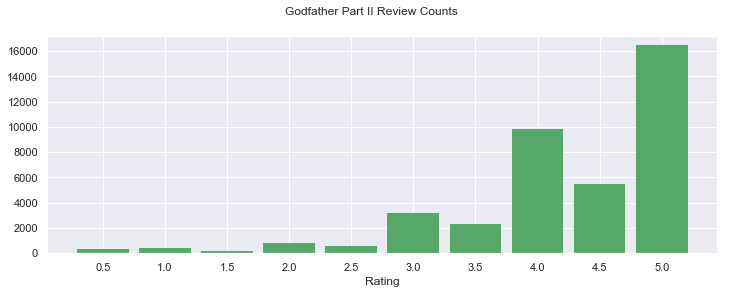

In [643]:
names = ['0.5','1.0','1.5','2.0','2.5','3.0','3.5','4.0','4.5','5.0']
values = bigtest_avg.iloc[1153,6:16]

plt.figure(figsize=(12, 4))

plot = plt.bar(names, values)
plt.setp(plot,color='g', linewidth=2.0)
plt.suptitle('Godfather Part II Review Counts')
plt.xlabel('Rating')
plt.show();

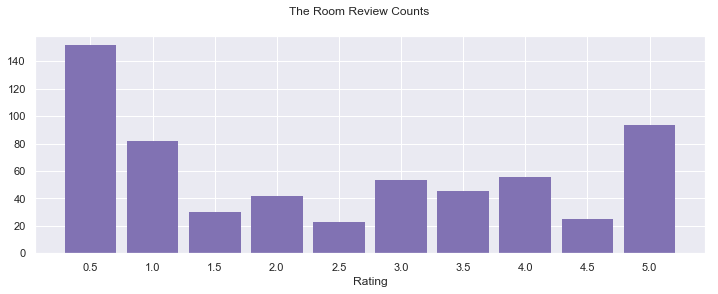

In [655]:
names = ['0.5','1.0','1.5','2.0','2.5','3.0','3.5','4.0','4.5','5.0']
values_gb = bigtest_avg.iloc[11322,6:16]

plt.figure(figsize=(12, 4))

plot = plt.bar(names, values_gb)
plt.setp(plot,color='m', linewidth=2.0)
plt.suptitle('The Room Review Counts')
plt.xlabel('Rating')
plt.show();

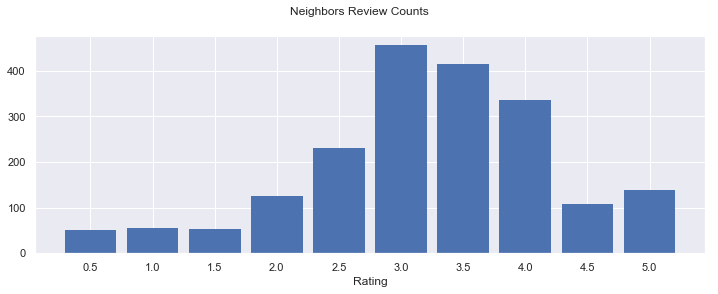

In [652]:
names = ['0.5','1.0','1.5','2.0','2.5','3.0','3.5','4.0','4.5','5.0']
values_norm = bigtest_avg.iloc[13507,6:16]

plt.figure(figsize=(12, 4))

plot = plt.bar(names, values_norm)
plt.setp(plot,color='b', linewidth=2.0)
plt.suptitle('Neighbors Review Counts')
plt.xlabel('Rating')
plt.show();

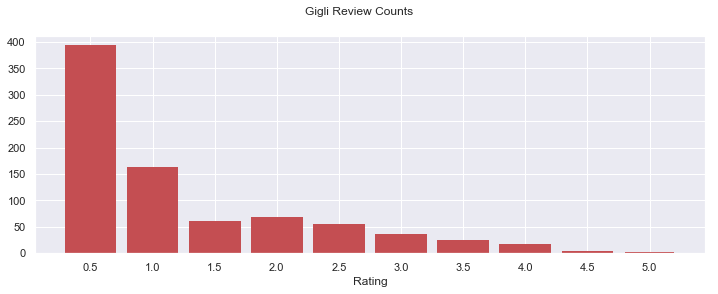

In [651]:
names = ['0.5','1.0','1.5','2.0','2.5','3.0','3.5','4.0','4.5','5.0']
values_bad = bigtest_avg.iloc[6094,6:16]

plt.figure(figsize=(12, 4))

plot = plt.bar(names, values_bad)
plt.setp(plot,color='r', linewidth=2.0)
plt.suptitle('Gigli Review Counts')
plt.xlabel('Rating')
plt.show();